In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample, convolve

In [2]:
PERIOD = 400

In [4]:
Y = pd.read_csv("beijing_temperature.csv", header=None).to_numpy()
Y

array([[ -10,    5,   10, ...,  156,  181,  176],
       [ -29,  -29,  -34, ...,  146,  166,  171],
       [ -20,  -34,  -44, ...,  -10,  -15,   -5],
       ...,
       [ -34,  -39,  -34, ...,  342,  356,  361],
       [-112, -122, -127, ...,  273,  288,  298],
       [   5,    0,   -5, ...,  351,  366,  371]])

In [5]:
Y = resample(Y, 1500, axis=1)
Y = np.round(Y)
Y = ((Y.T - Y.T.mean(axis=0)) / (Y.T.std(axis=0))).T
Y.shape

(12, 1500)

In [12]:
baseline = np.mean(Y, axis=1)
baseline

array([ 0.00000000e+00,  4.73695157e-18,  9.47390314e-18,  0.00000000e+00,
       -9.47390314e-18, -1.18423789e-17, -3.55271368e-18,  0.00000000e+00,
       -4.73695157e-18,  1.42108547e-17, -9.47390314e-18,  0.00000000e+00])

In [ ]:
# kernel = 0.2 * np.ones(7)
# smoothed_ecg = np.zeros_like(Y)
# for i in range(12):
#     smoothed_ecg[i] = convolve(Y[i], kernel, mode="same")
#     plt.figure(figsize=(50, 5))
#     plt.plot(Y[i][:PERIOD], 'o-')
#     # plt.plot(smoothed_ecg[i][:3*400], '.-')

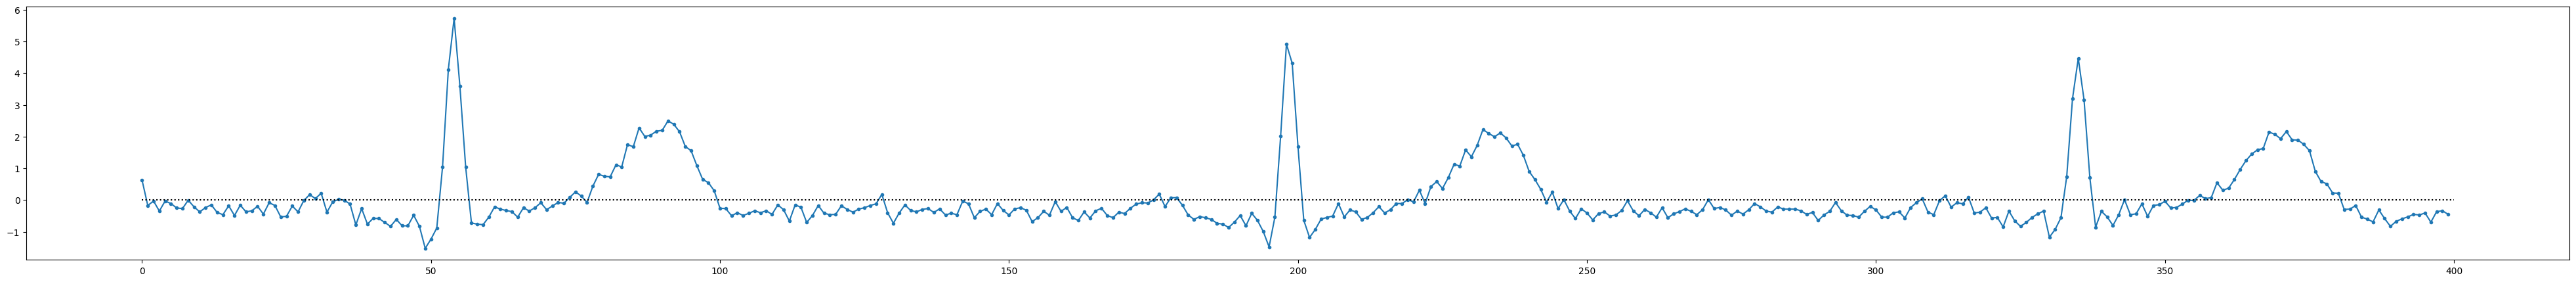

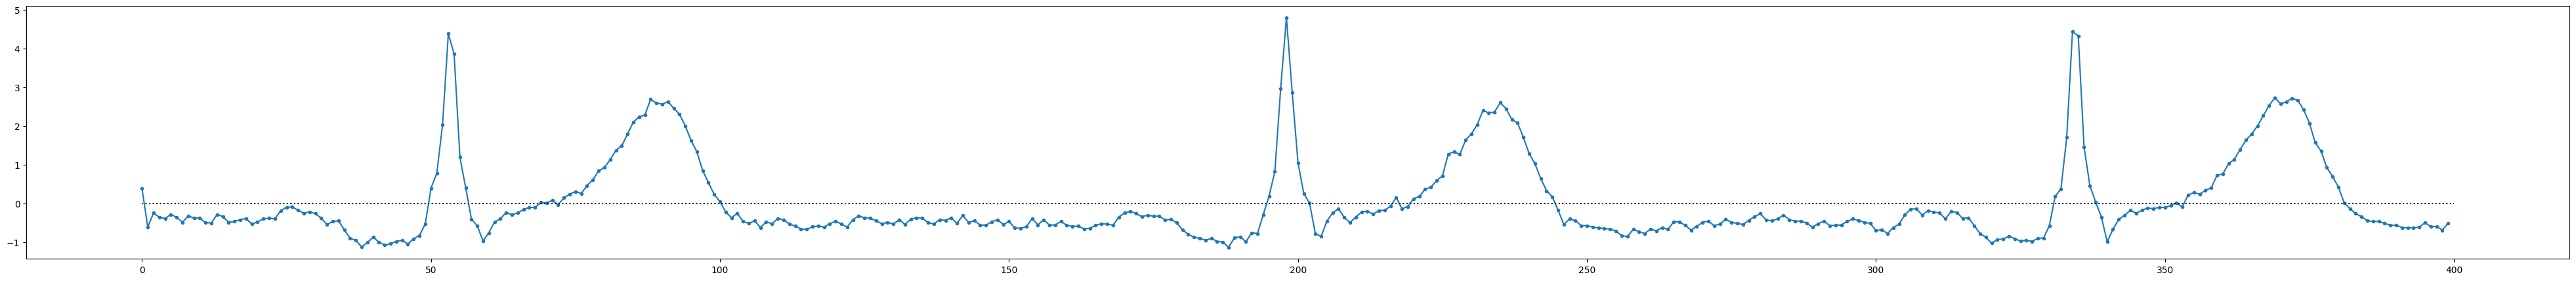

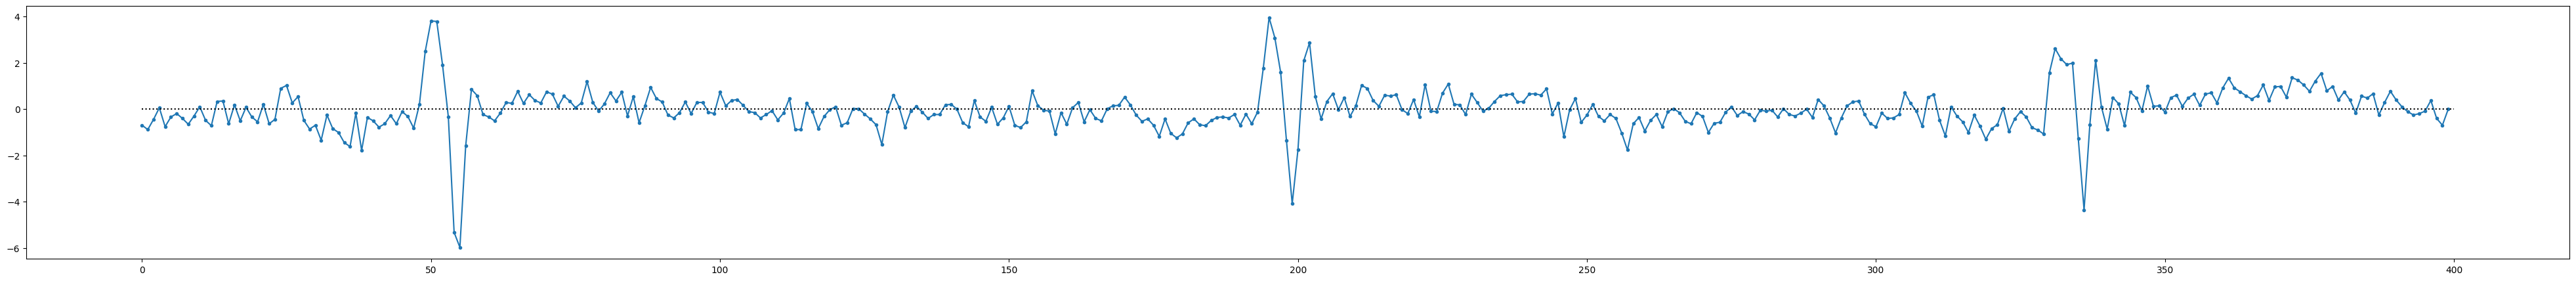

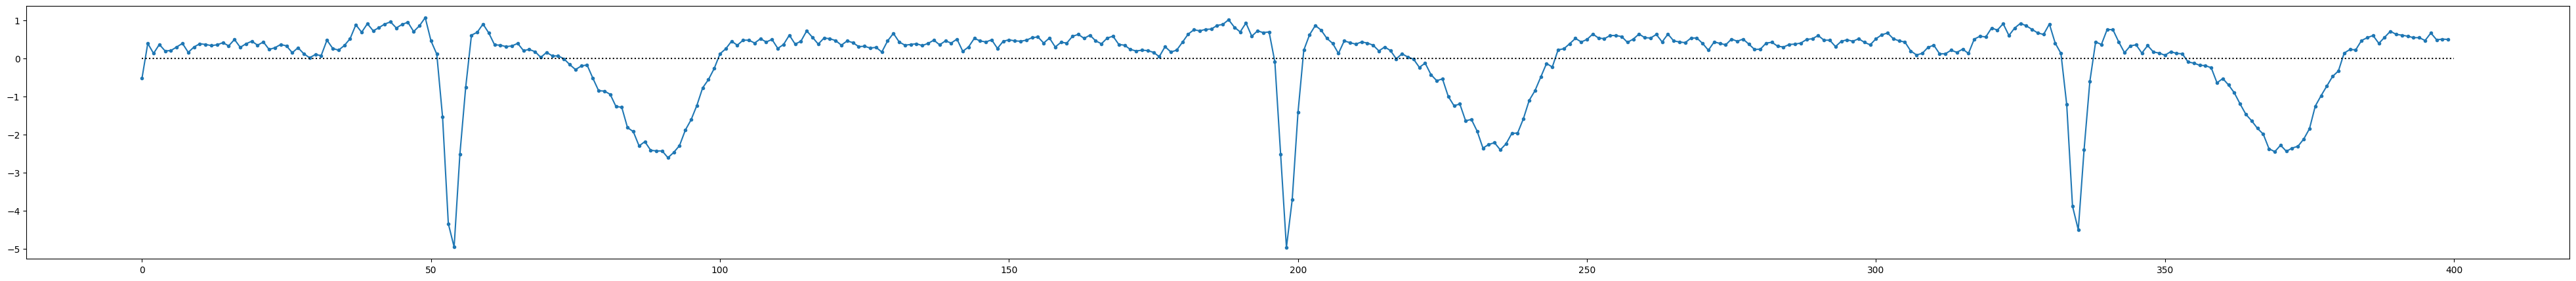

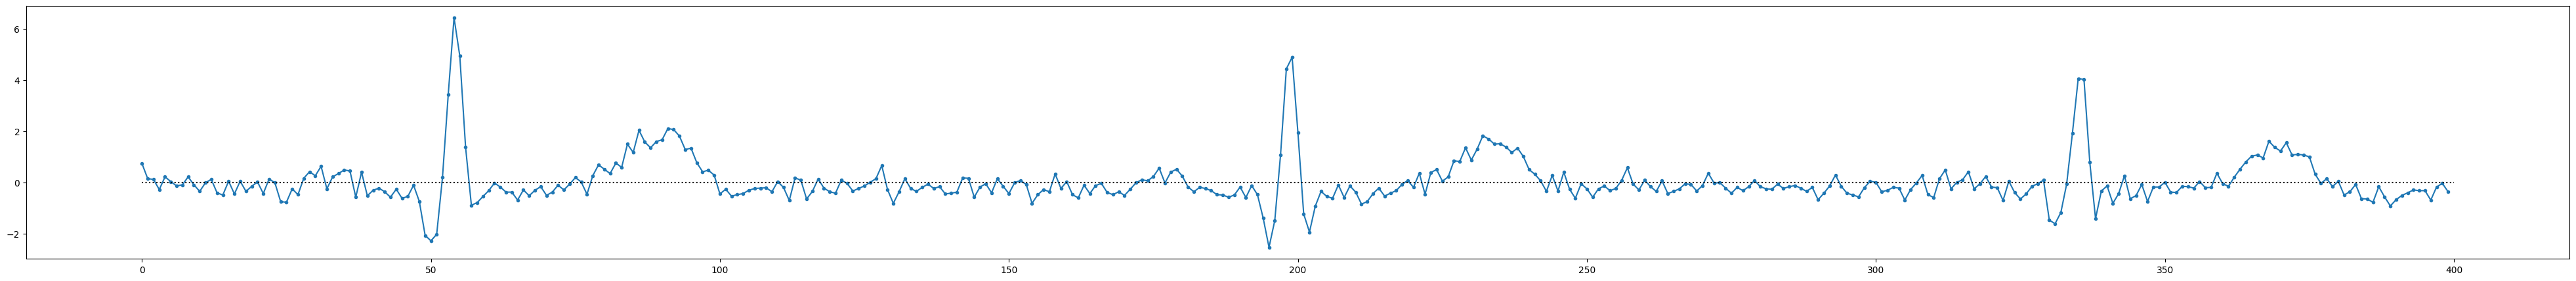

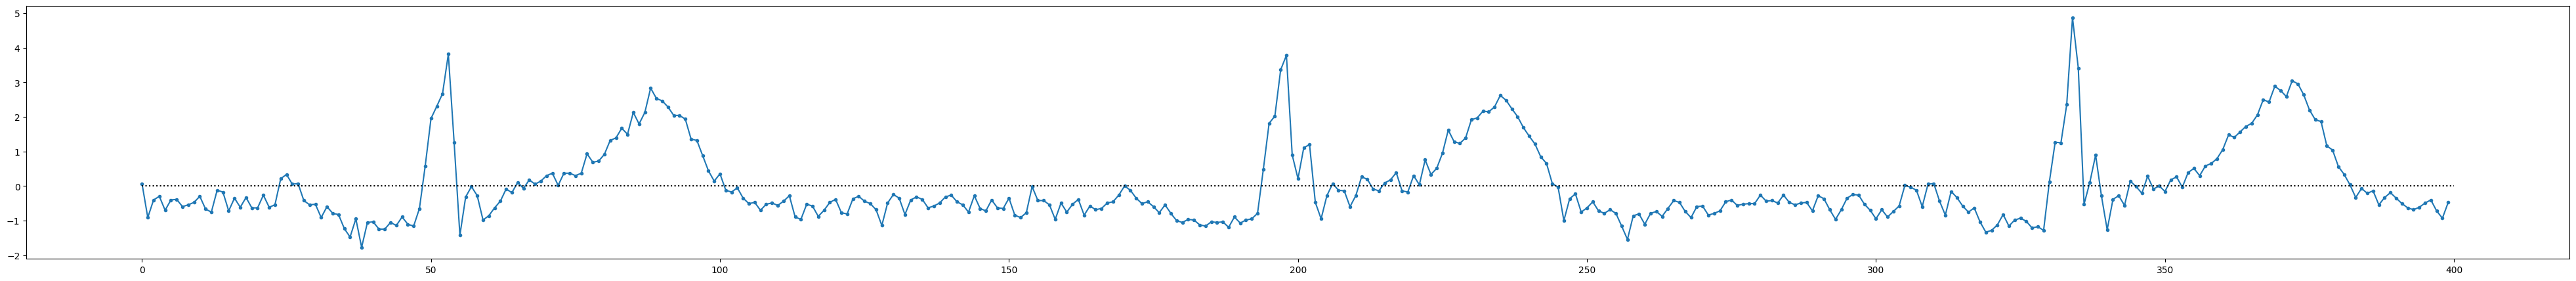

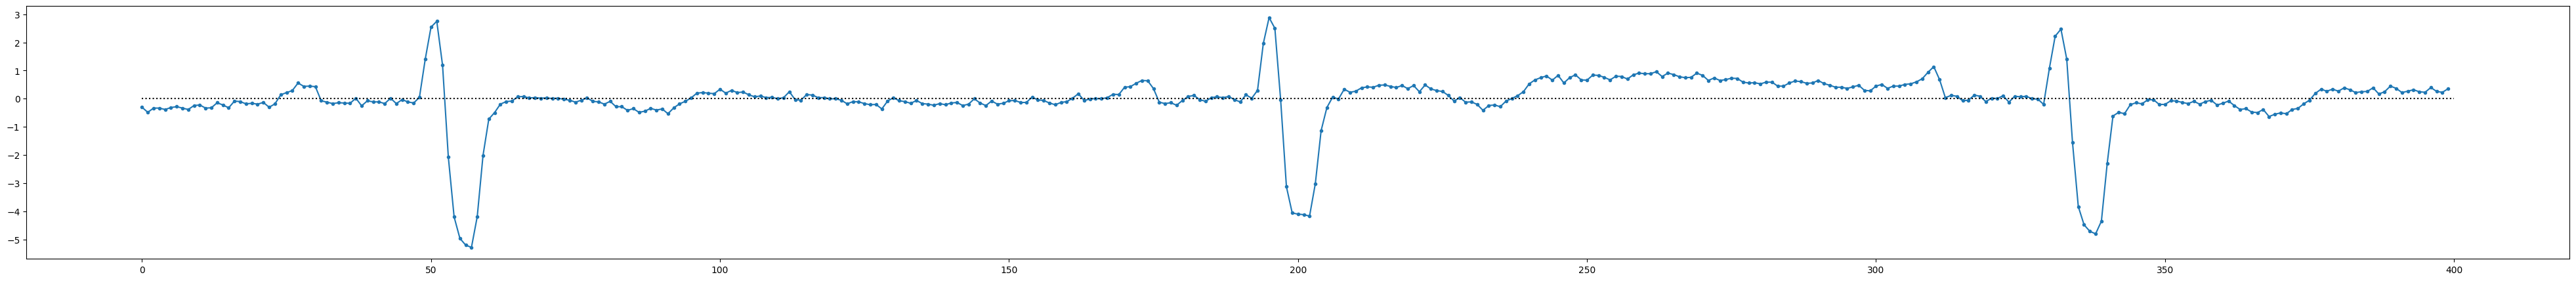

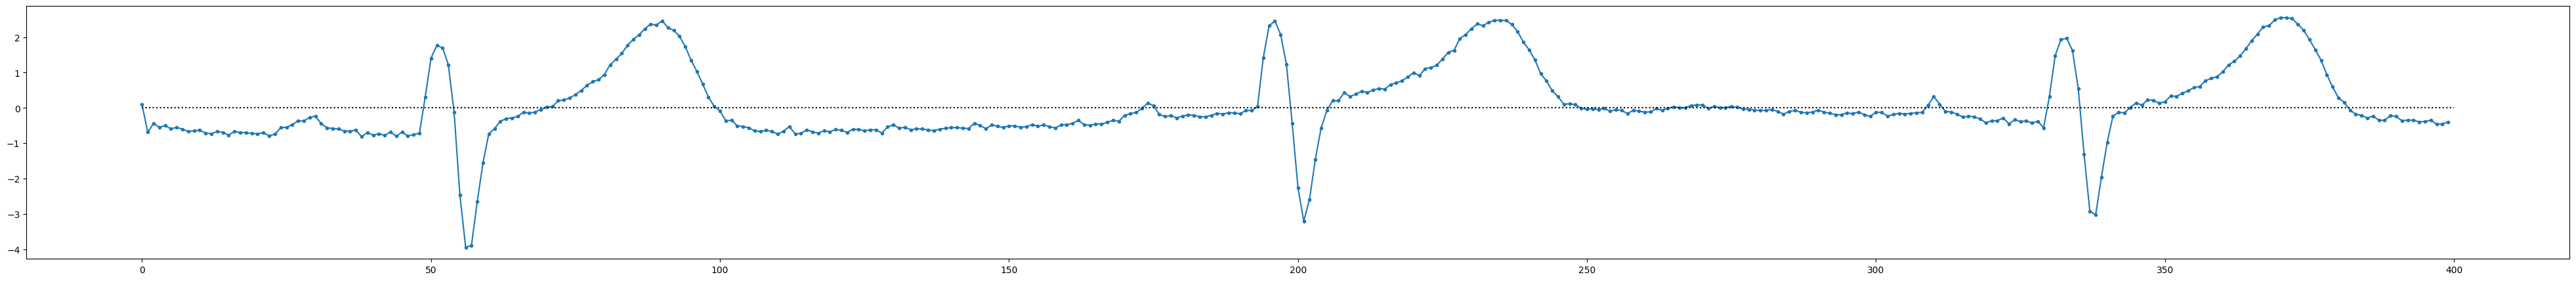

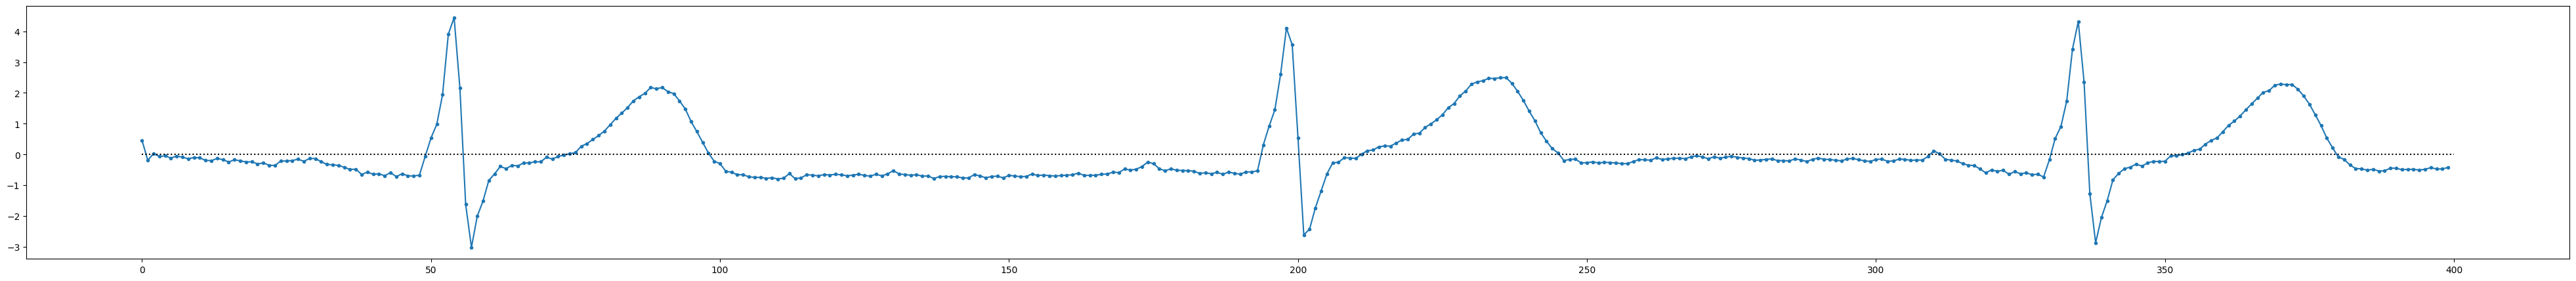

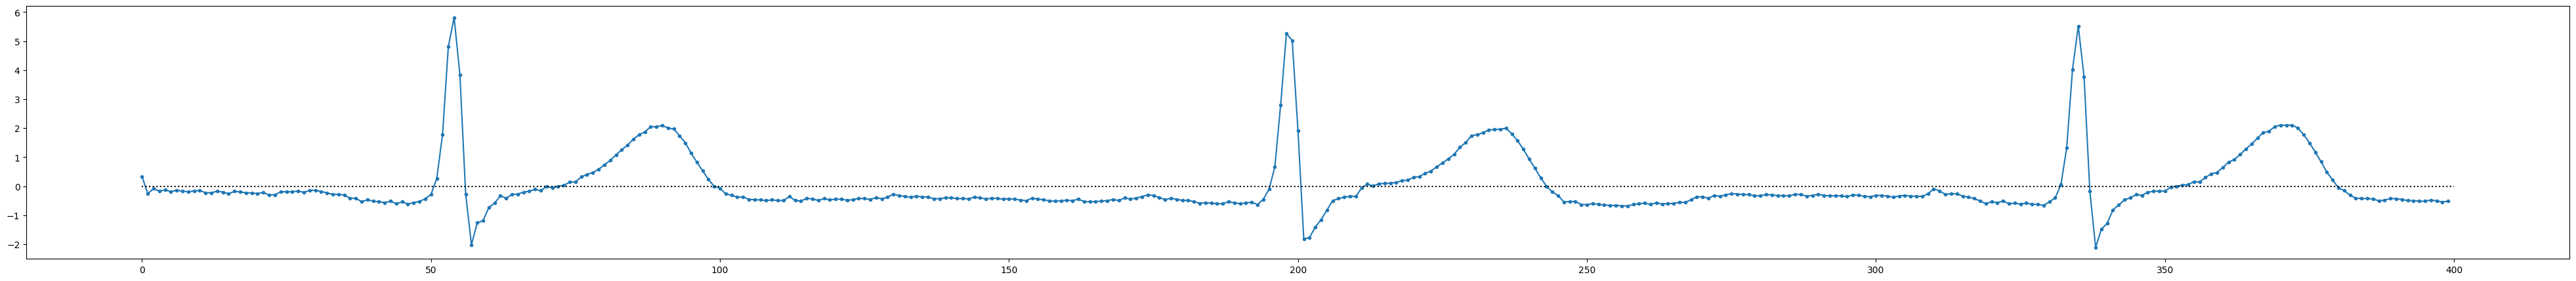

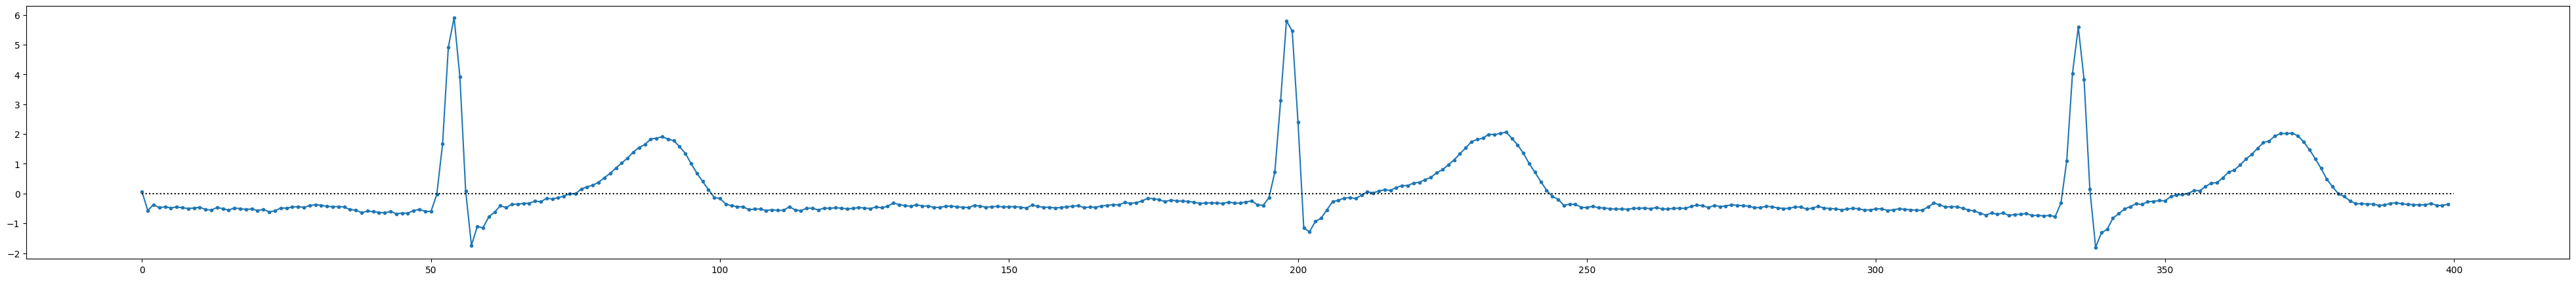

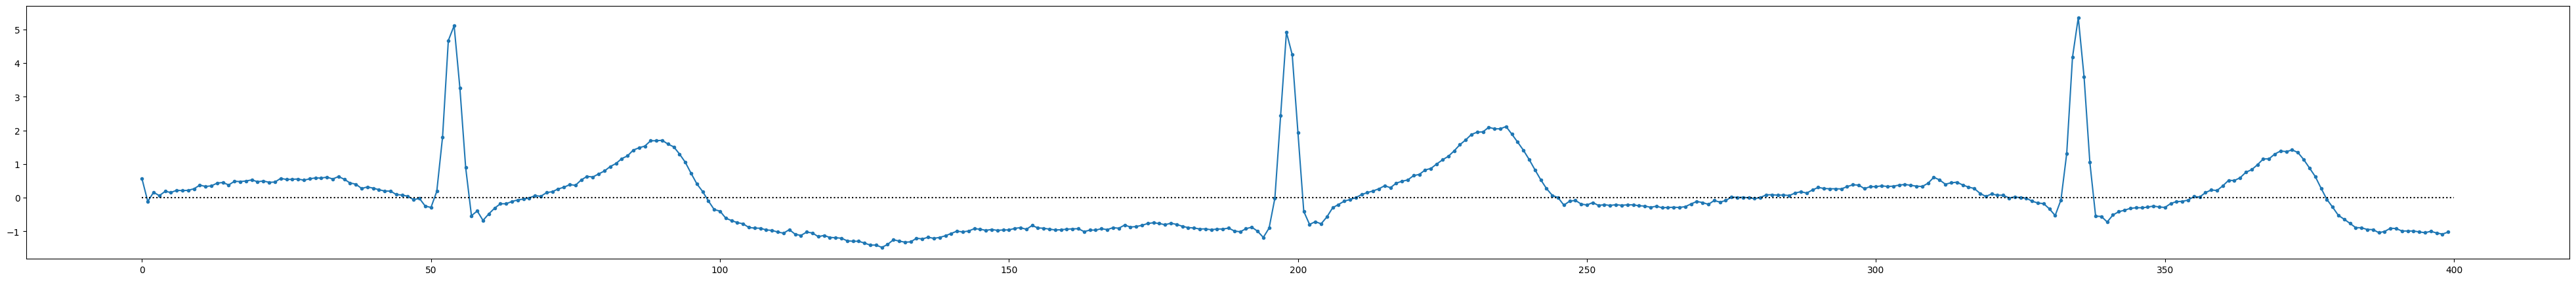

In [18]:
for i in range(12):
    plt.figure(figsize=(50, 5))
    plt.plot(Y[i][:PERIOD], '.-')
    plt.hlines(baseline[i], 0, PERIOD, linestyles="dotted", colors="black")

In [19]:
rec = pd.read_csv("1500_6_6_1500it.csv", header=None).to_numpy()
rec.shape

(12, 400)

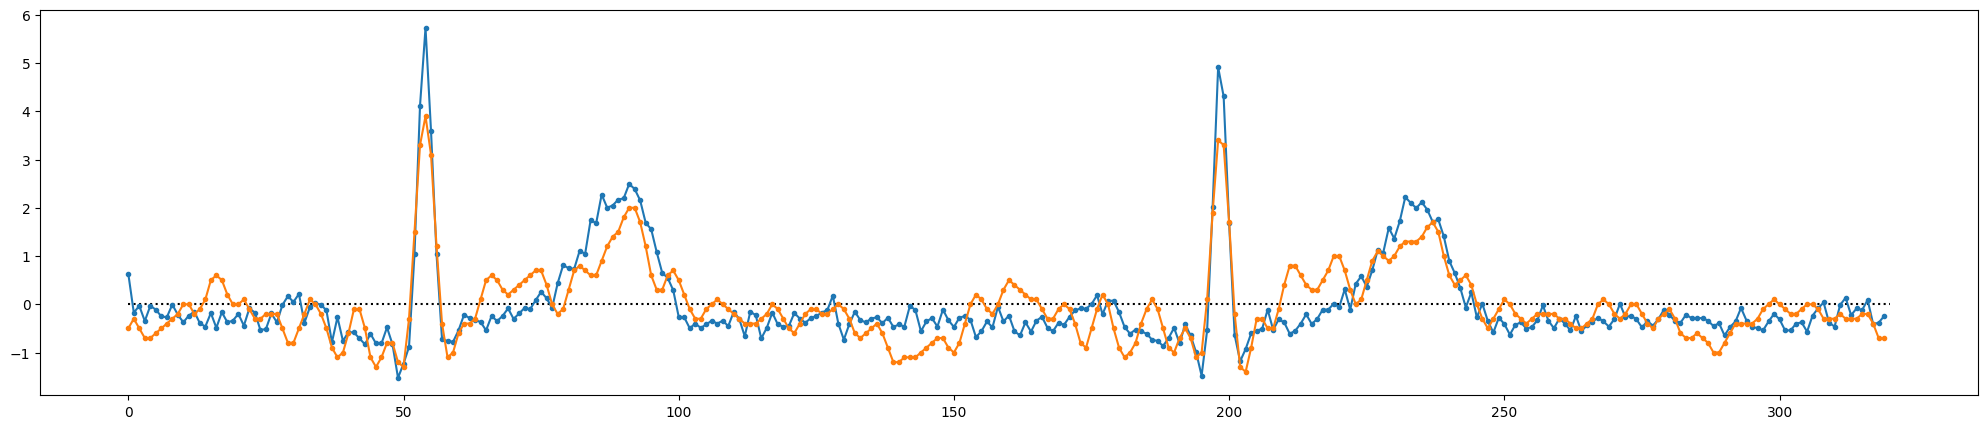

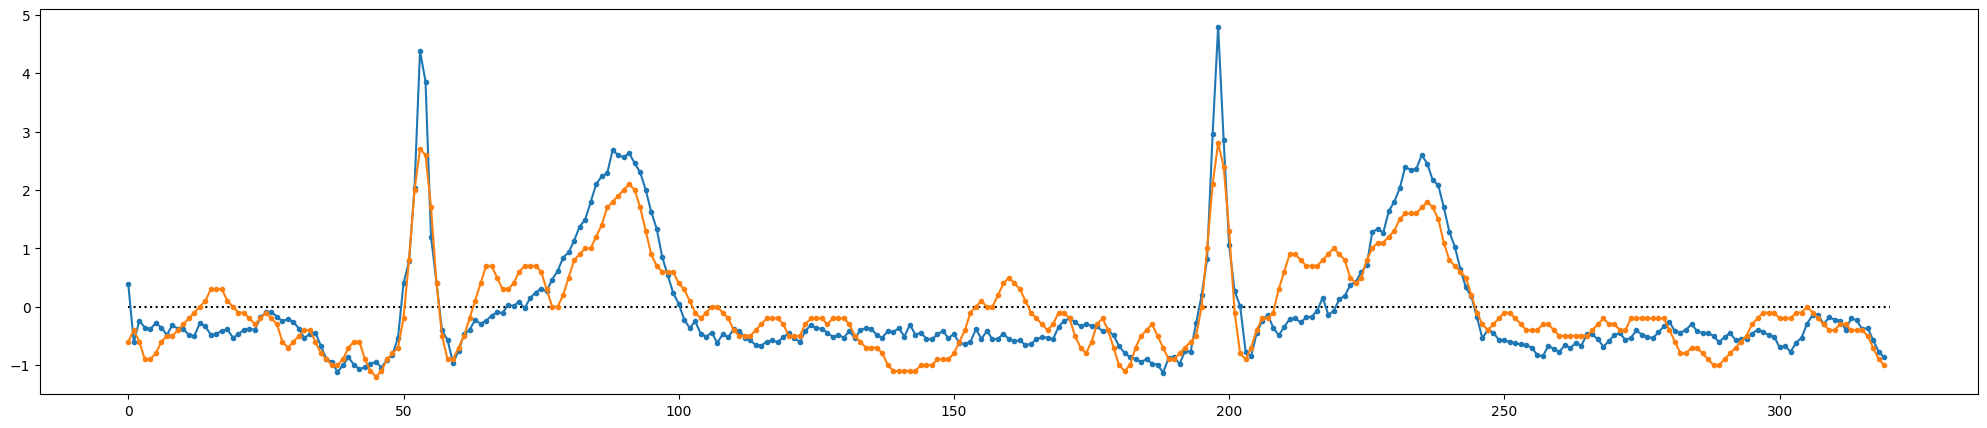

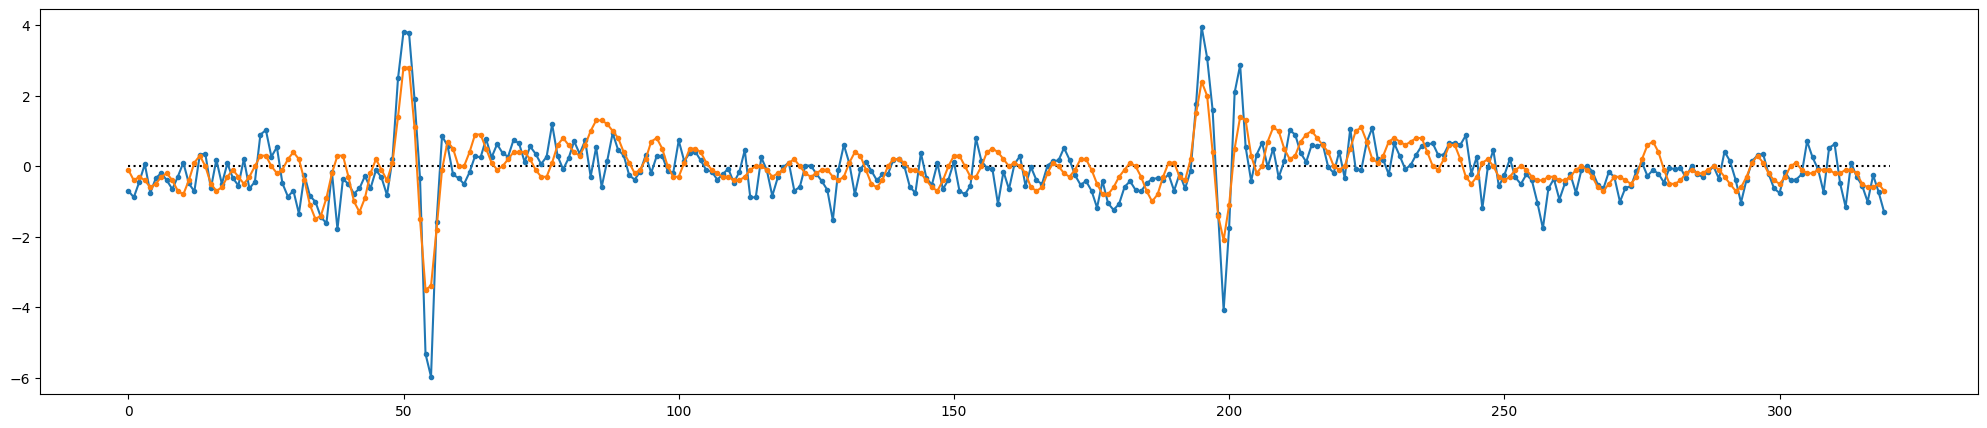

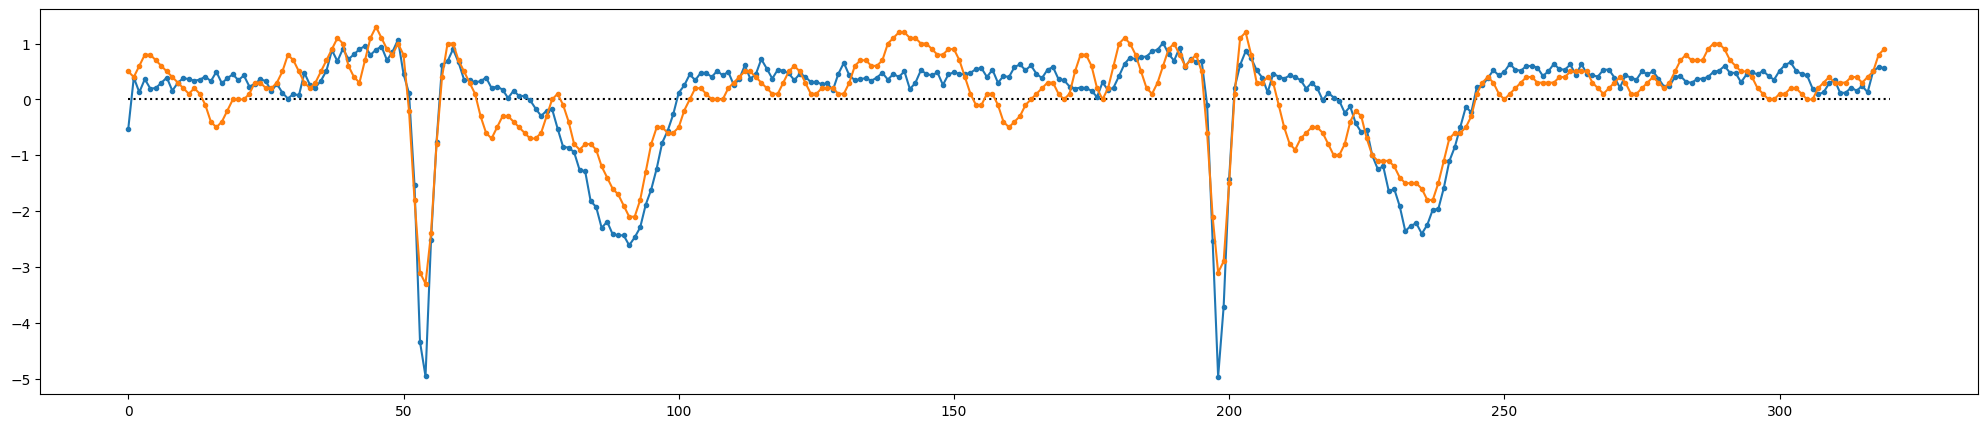

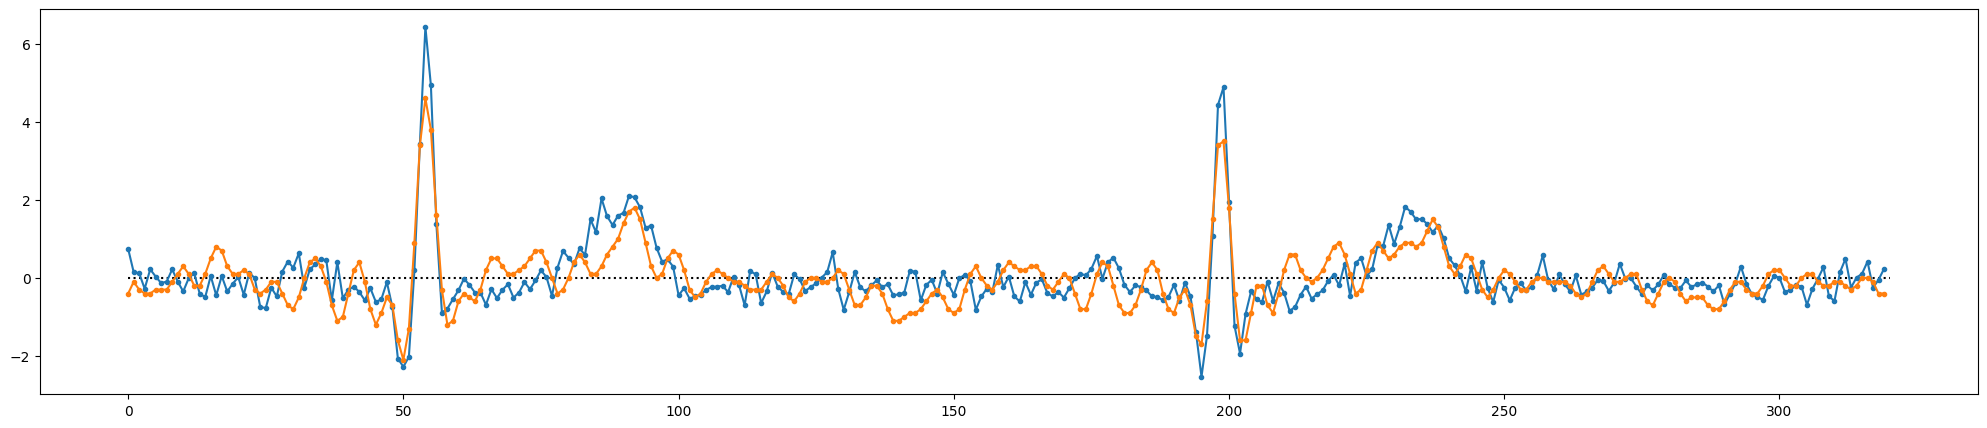

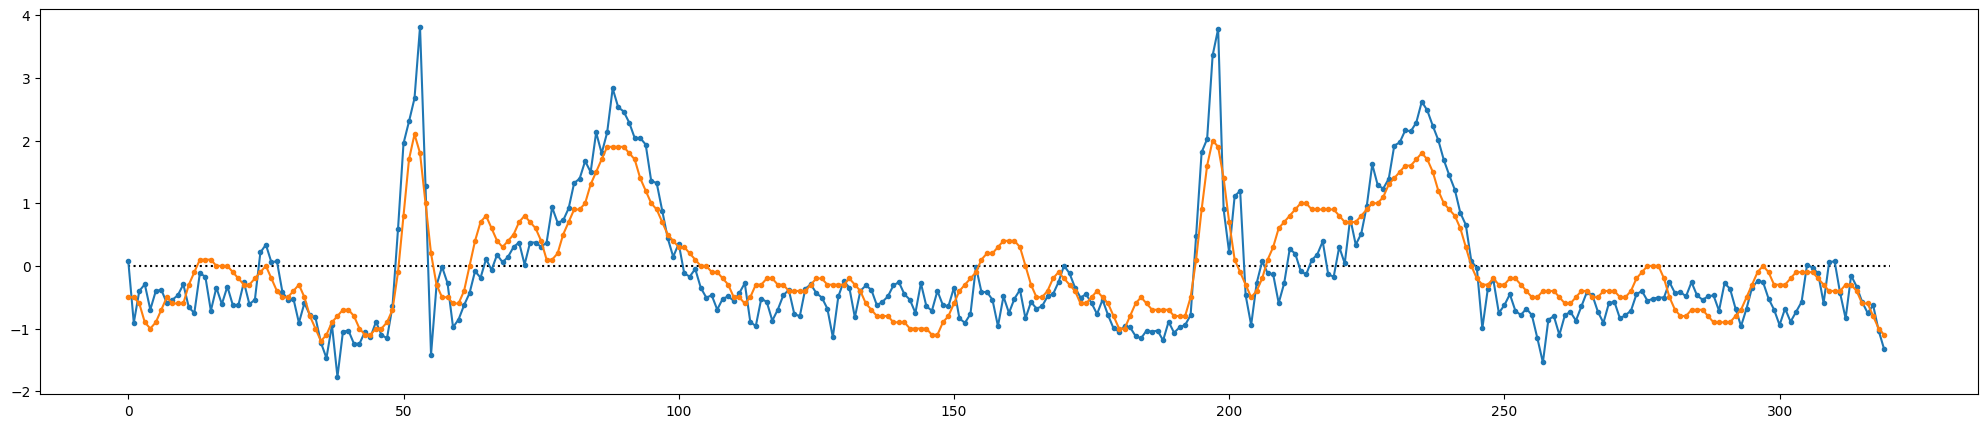

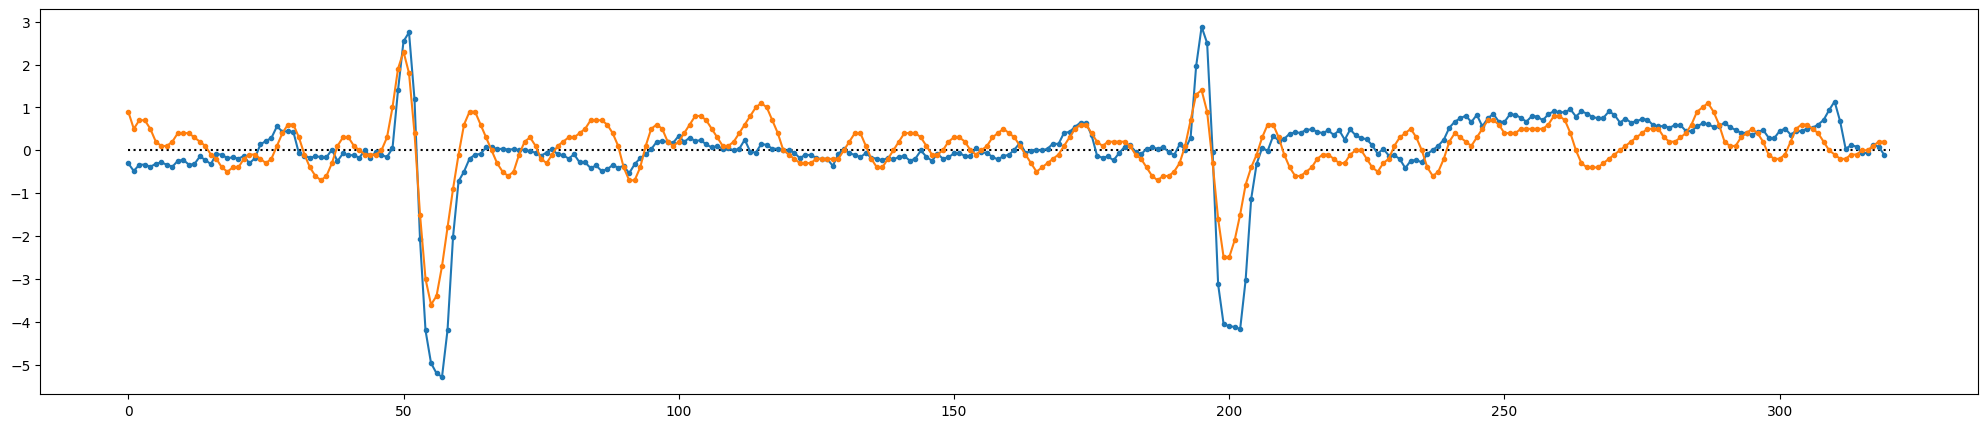

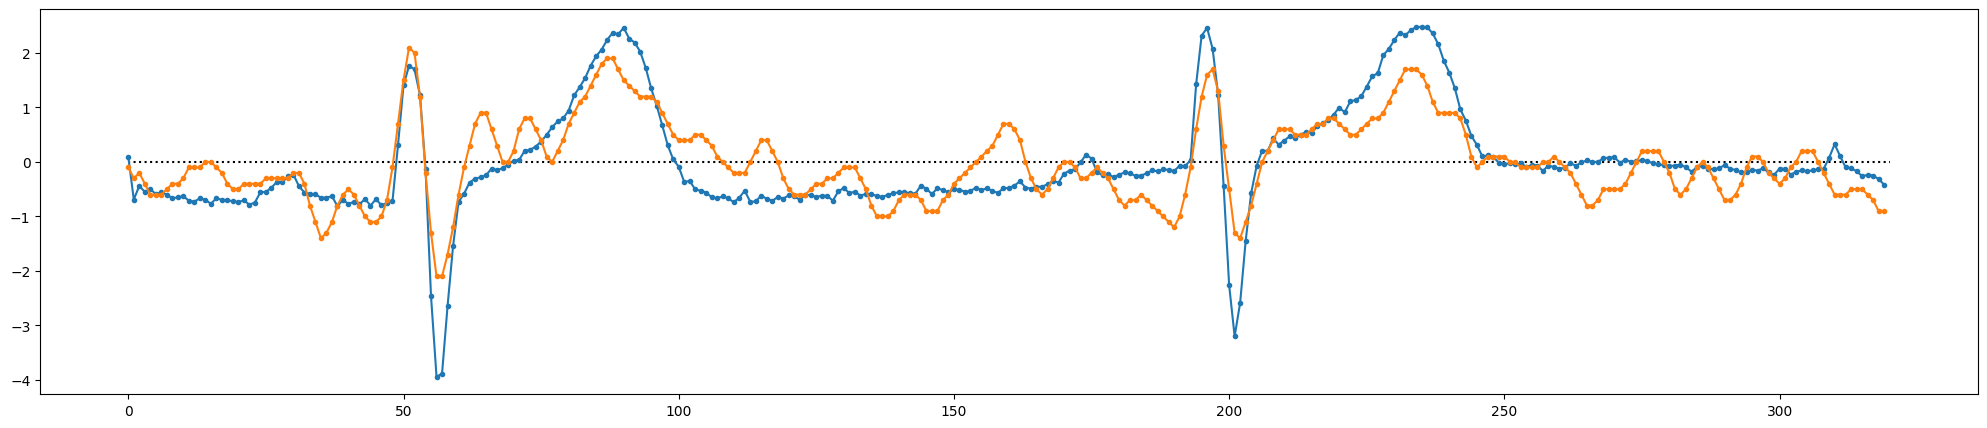

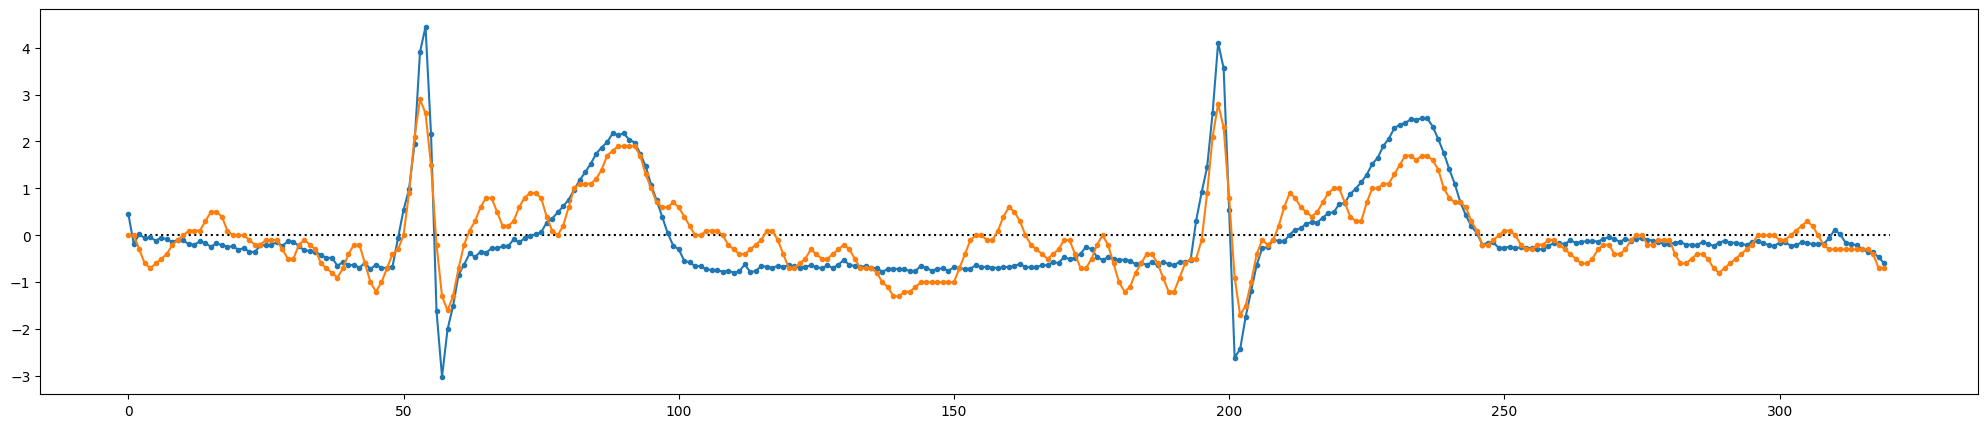

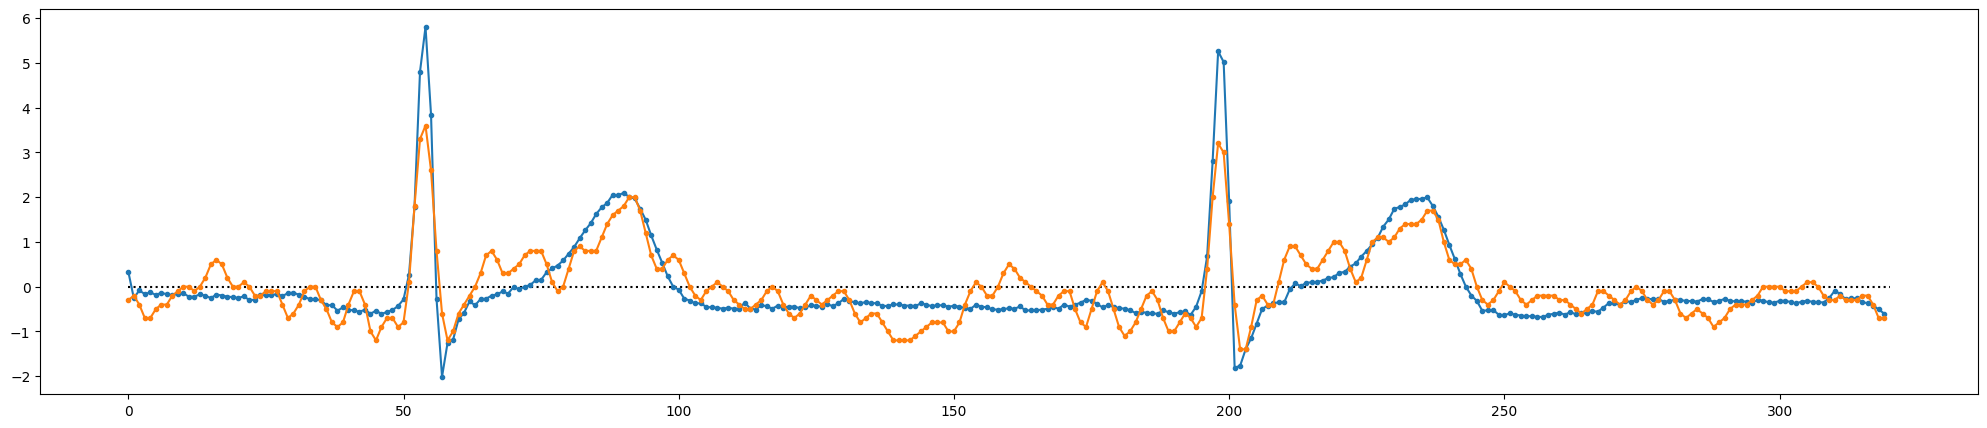

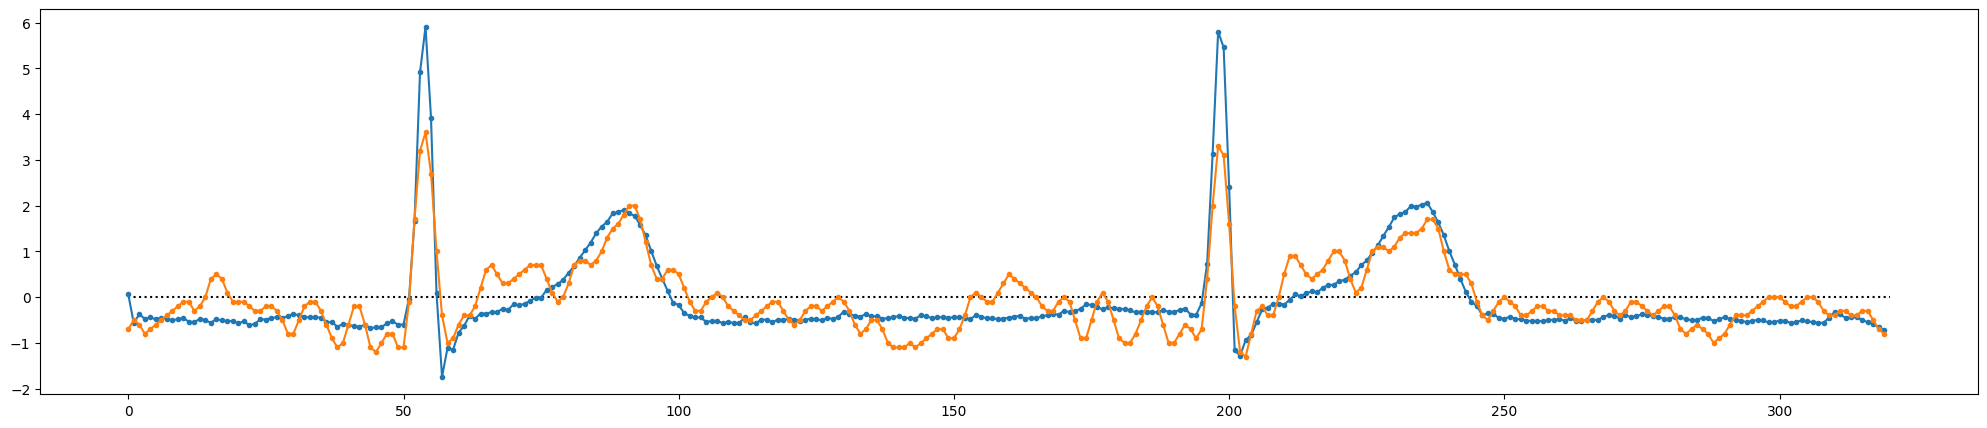

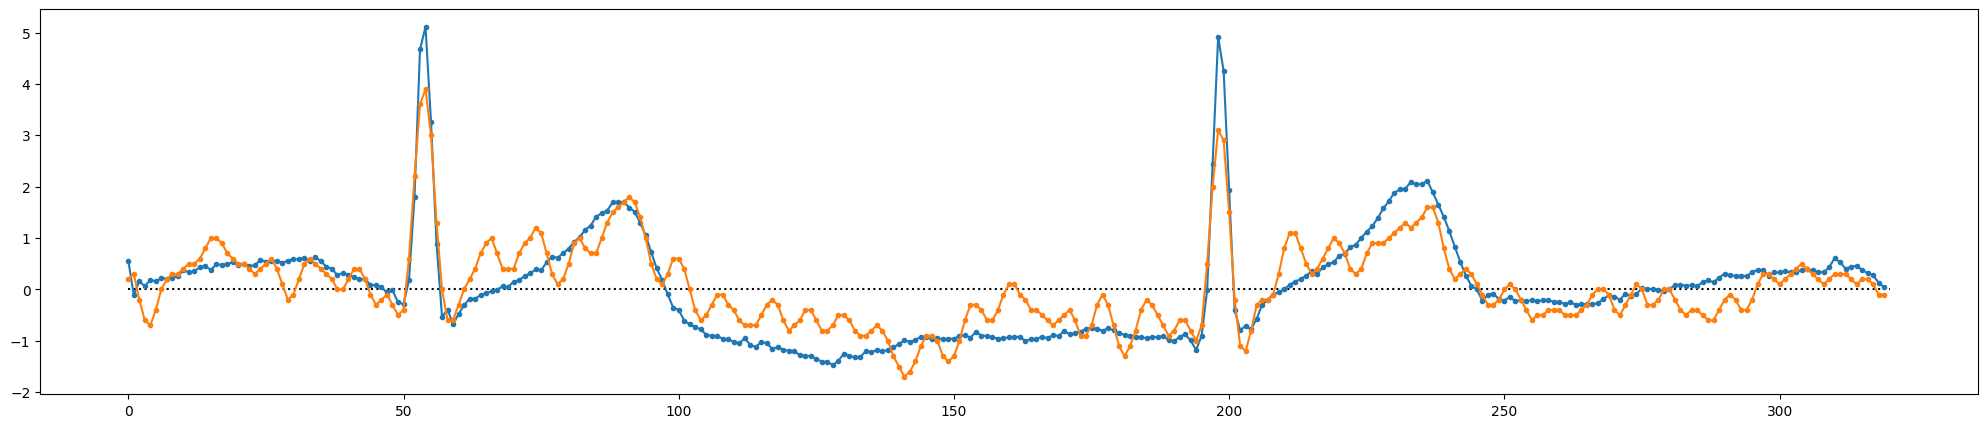

In [22]:
fit_index = int(PERIOD - 0.2 * PERIOD)
for i in range(12):
    plt.figure(figsize=(25, 5))
    # plt.hlines(0, 0, fit_index)
    plt.hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    plt.plot(Y[i][:fit_index], '.-')
    plt.plot(rec[i][:fit_index].round(1), '.-')

In [ ]:
# threshold = 1.25

In [ ]:
# difference

In [ ]:
# threshold = np.percentile(difference, 97.5)
# threshold

In [ ]:
# isolated_peaks = np.where(difference > threshold, Y[:,:fit_index], 0)
# isolated_peaks

[ 54 198]
[ 53 198]
[38 55]
[ 54 198]
[54 86]
[ 53 198]
[ 57 202]
[ 56 201]
[ 54 201]
[ 54 199]
[198 199]
[198 199]


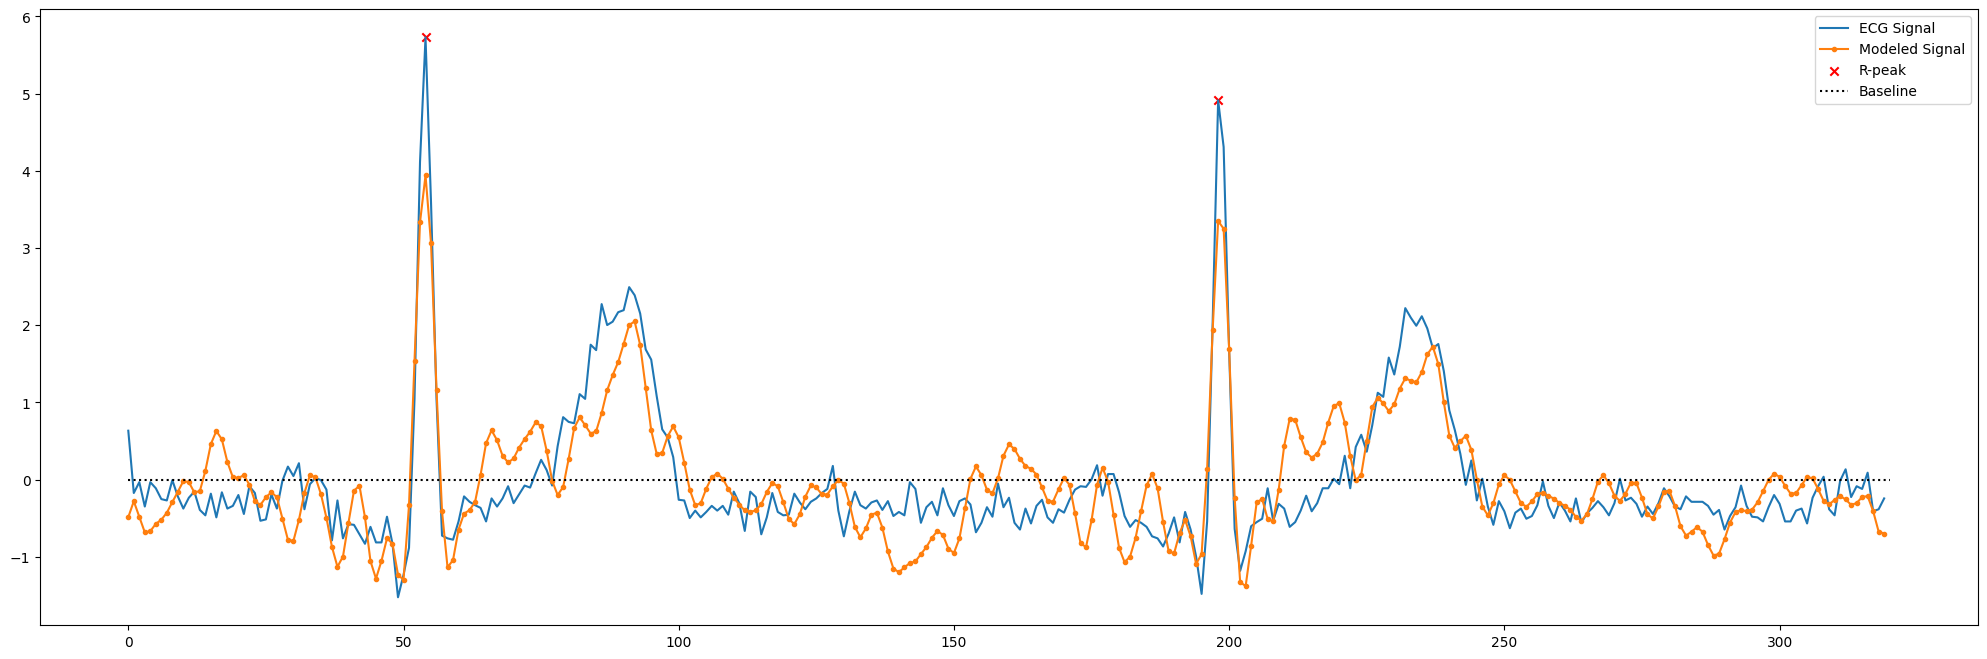

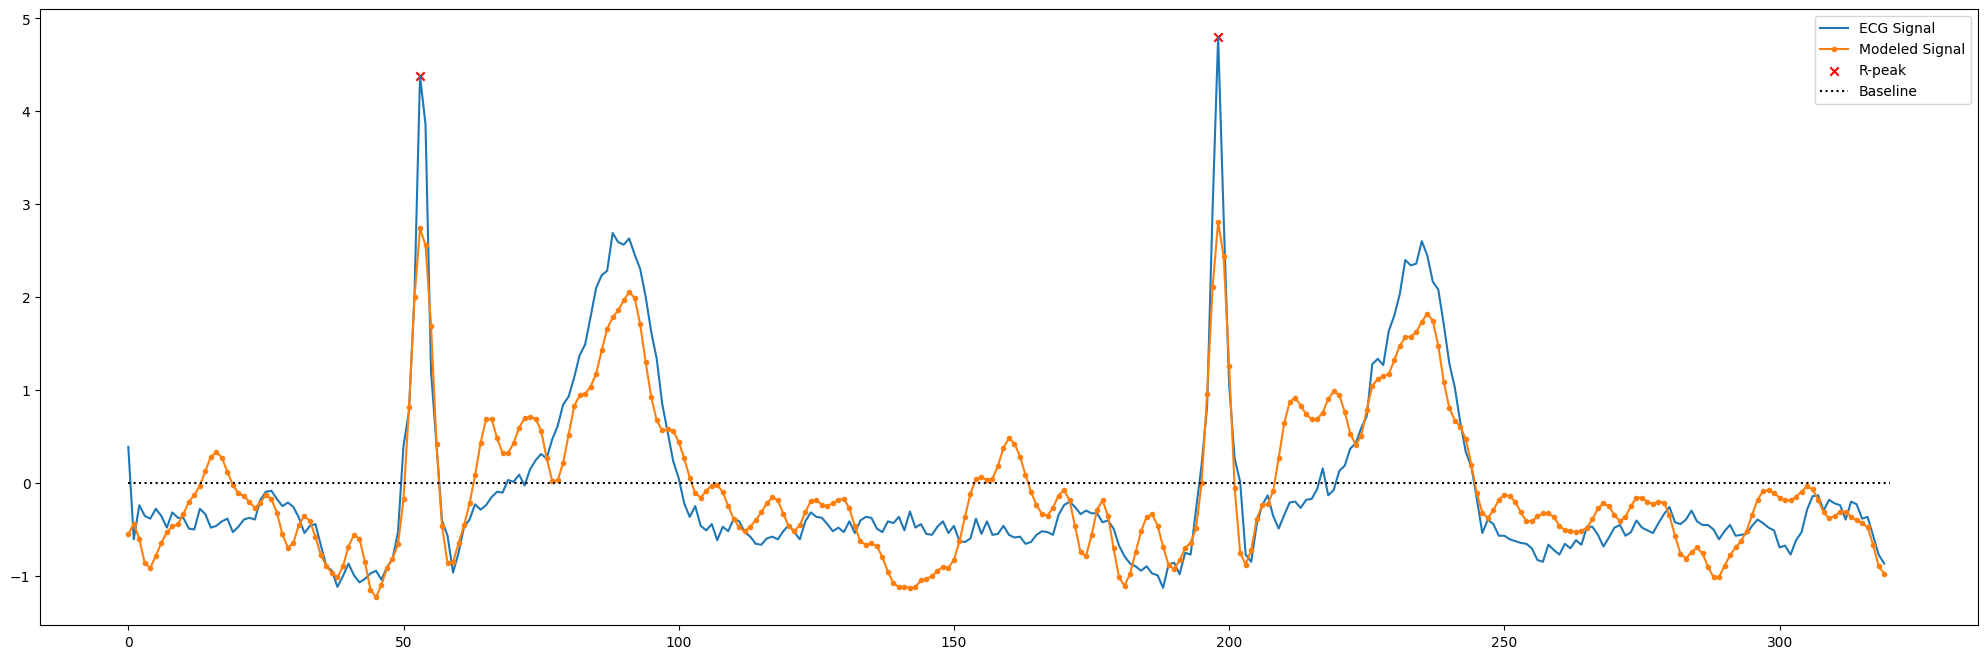

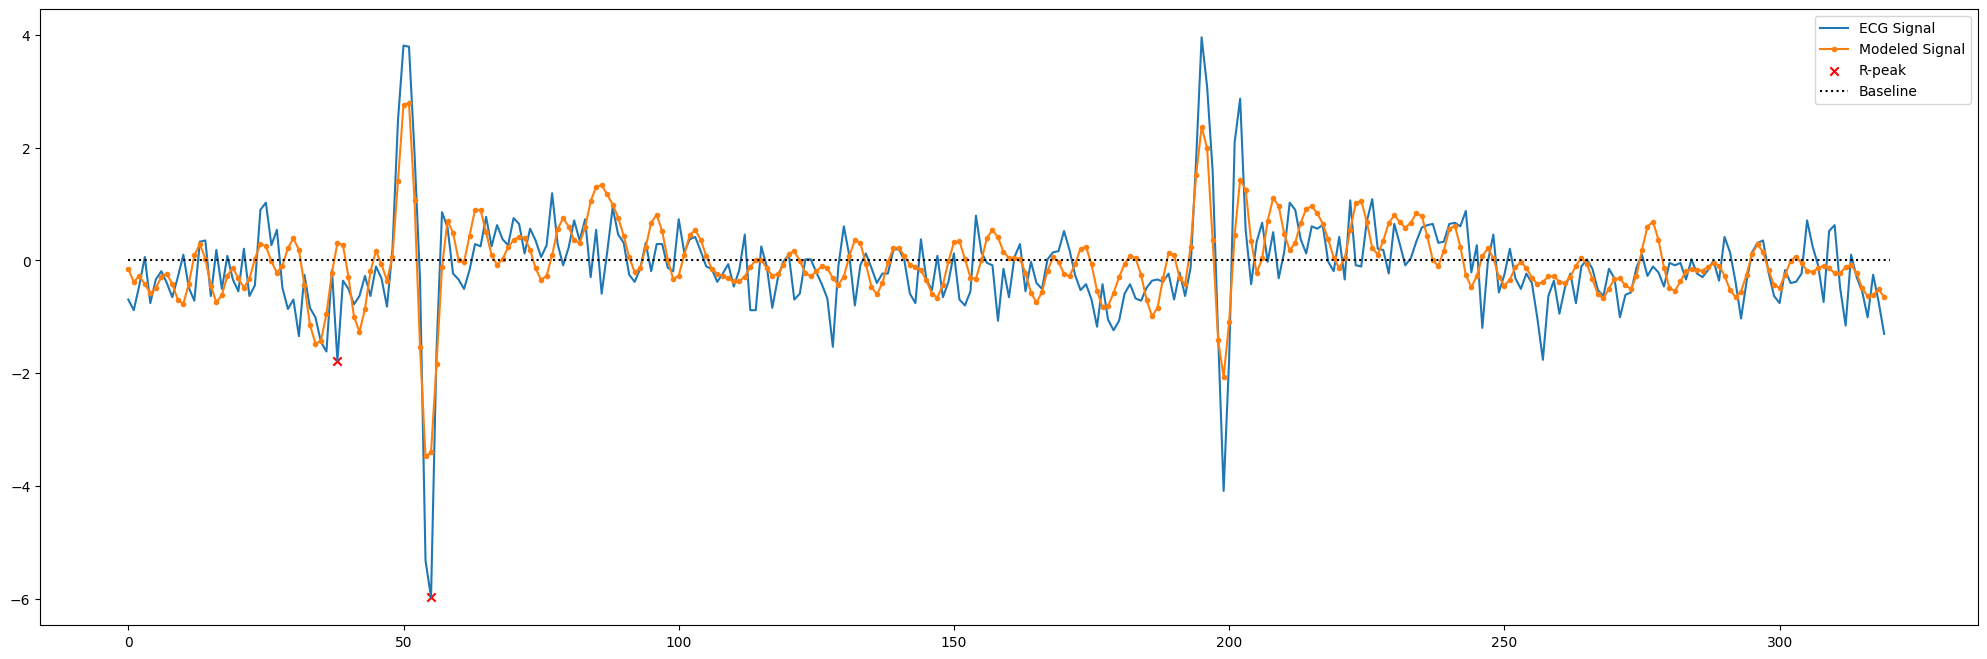

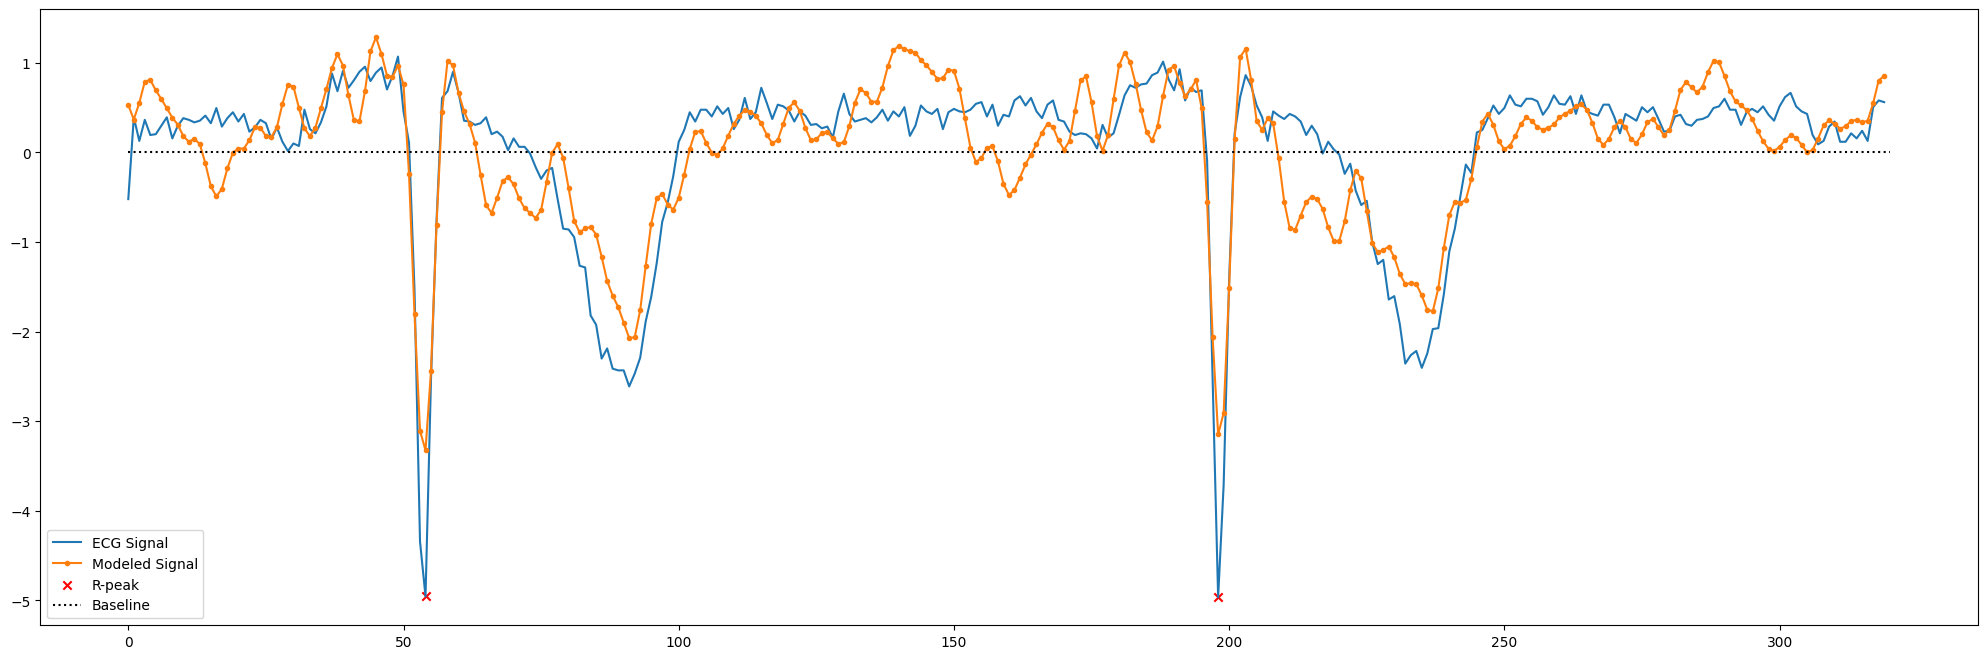

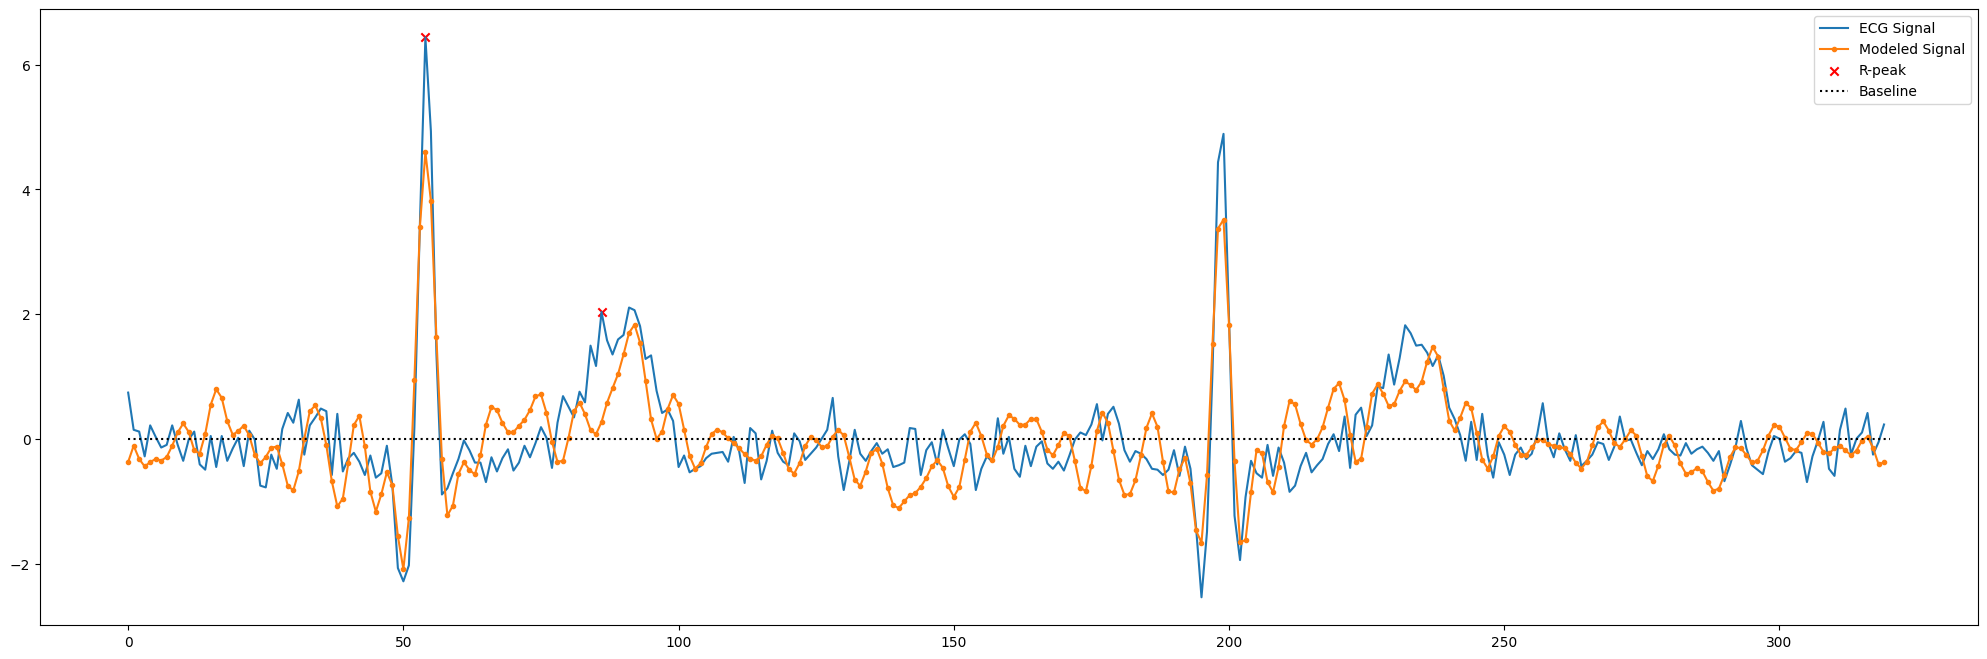

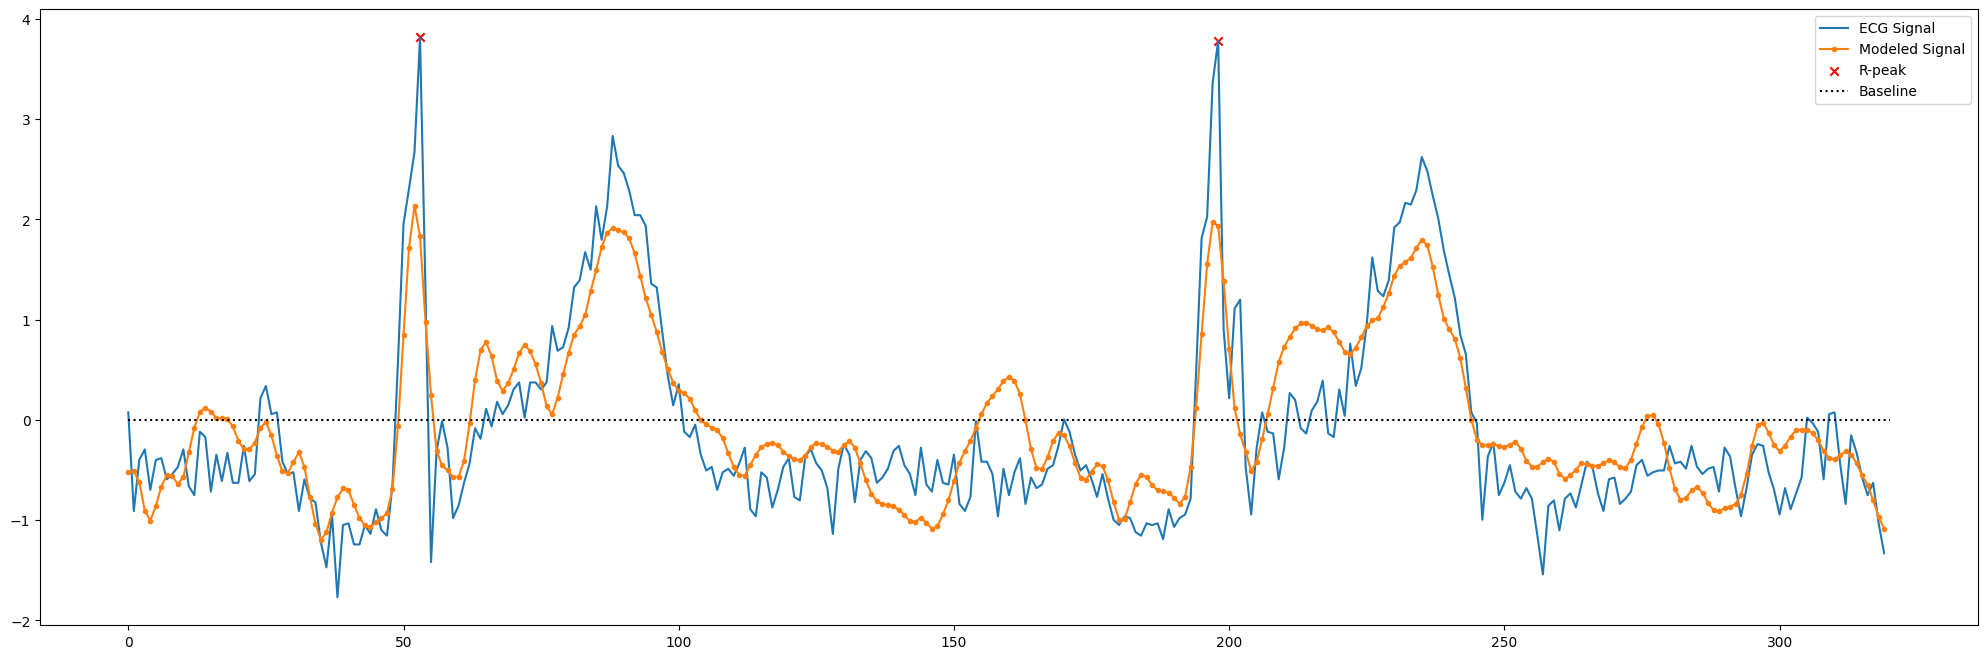

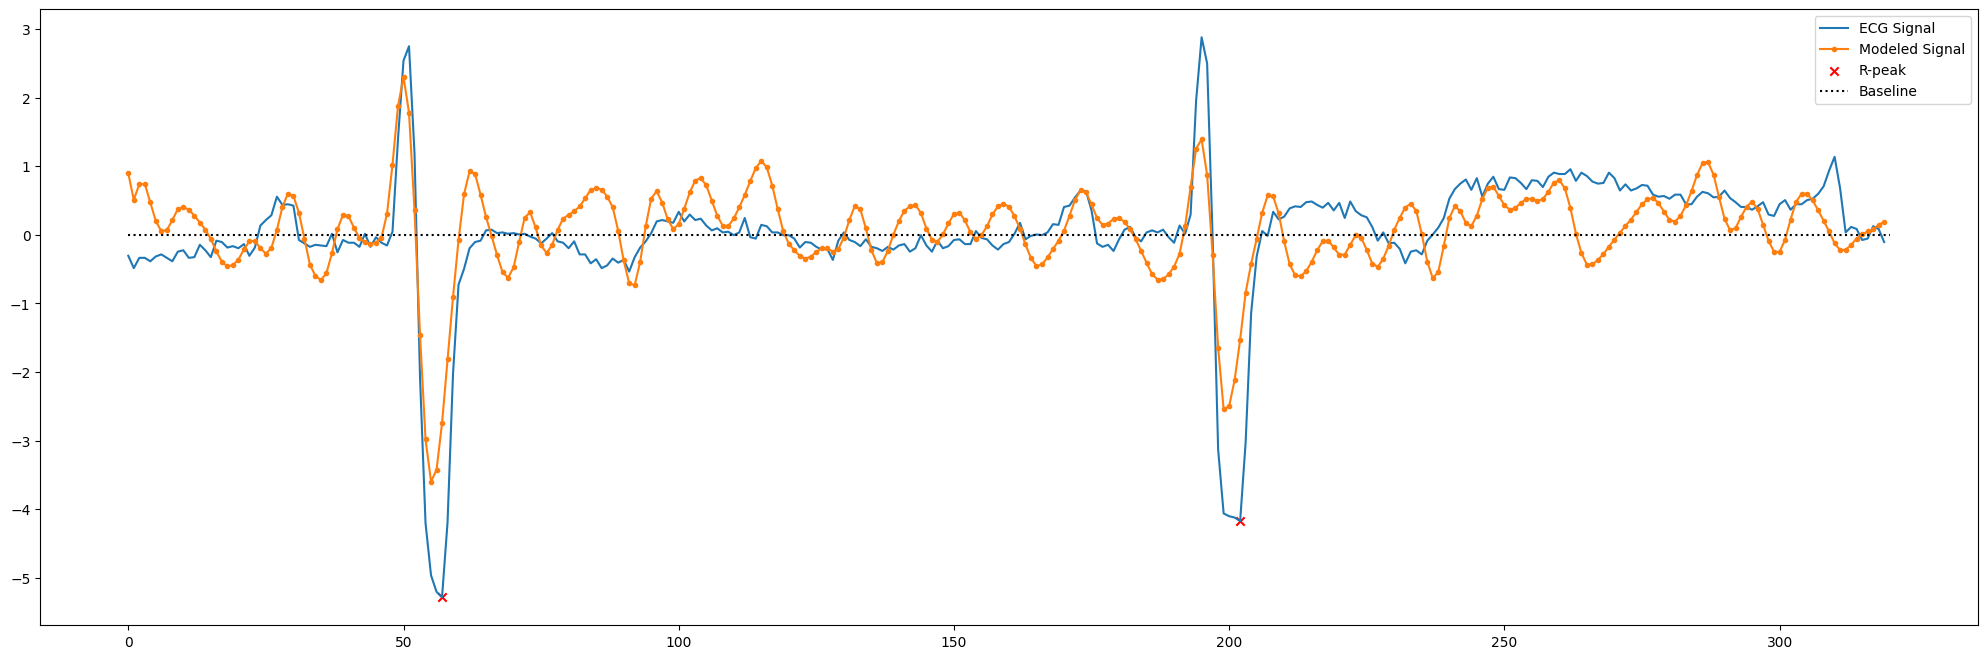

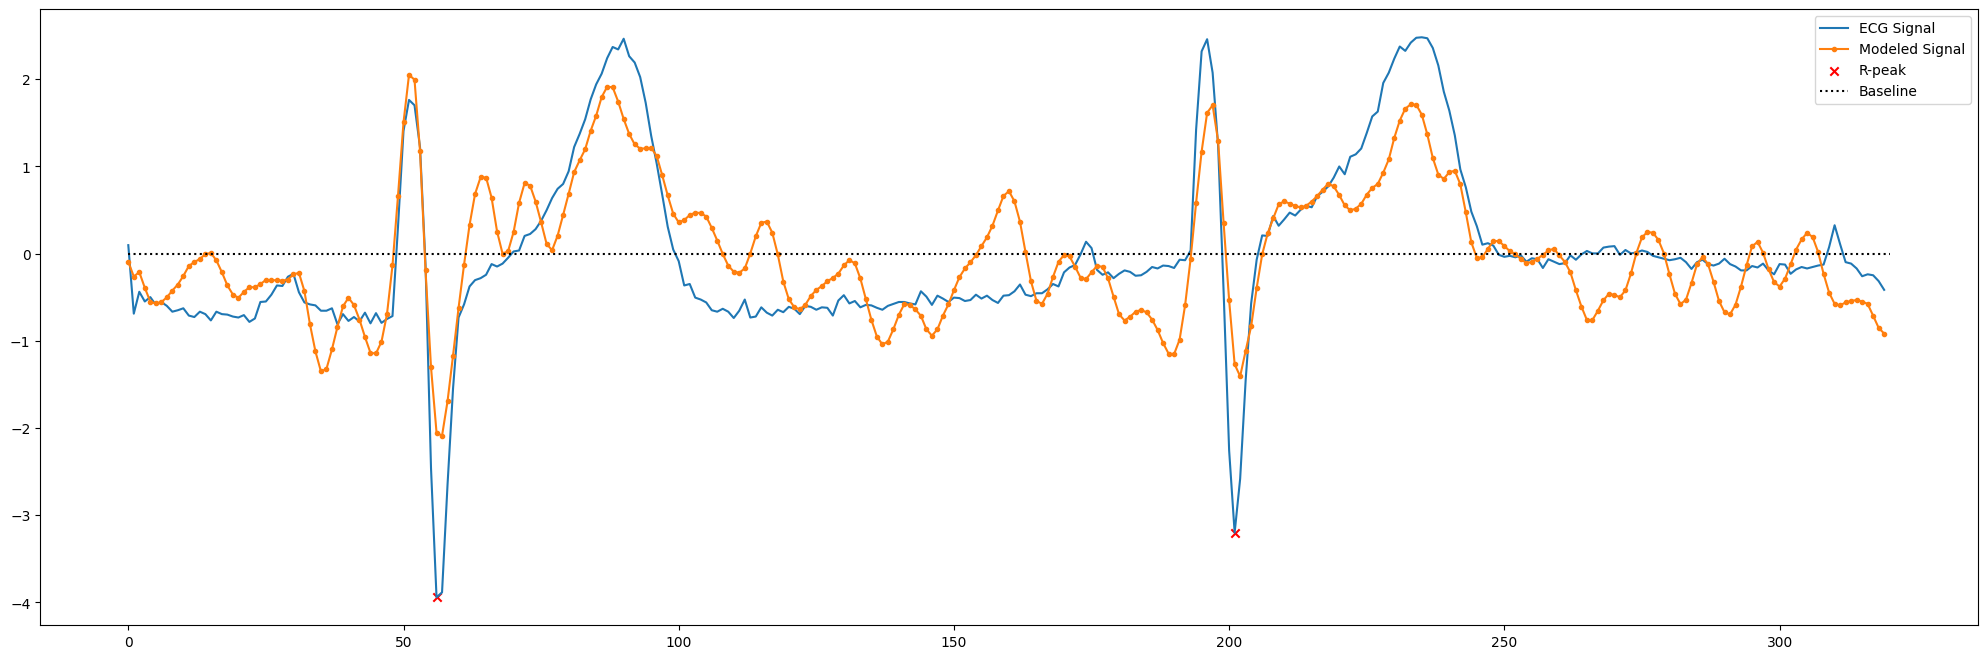

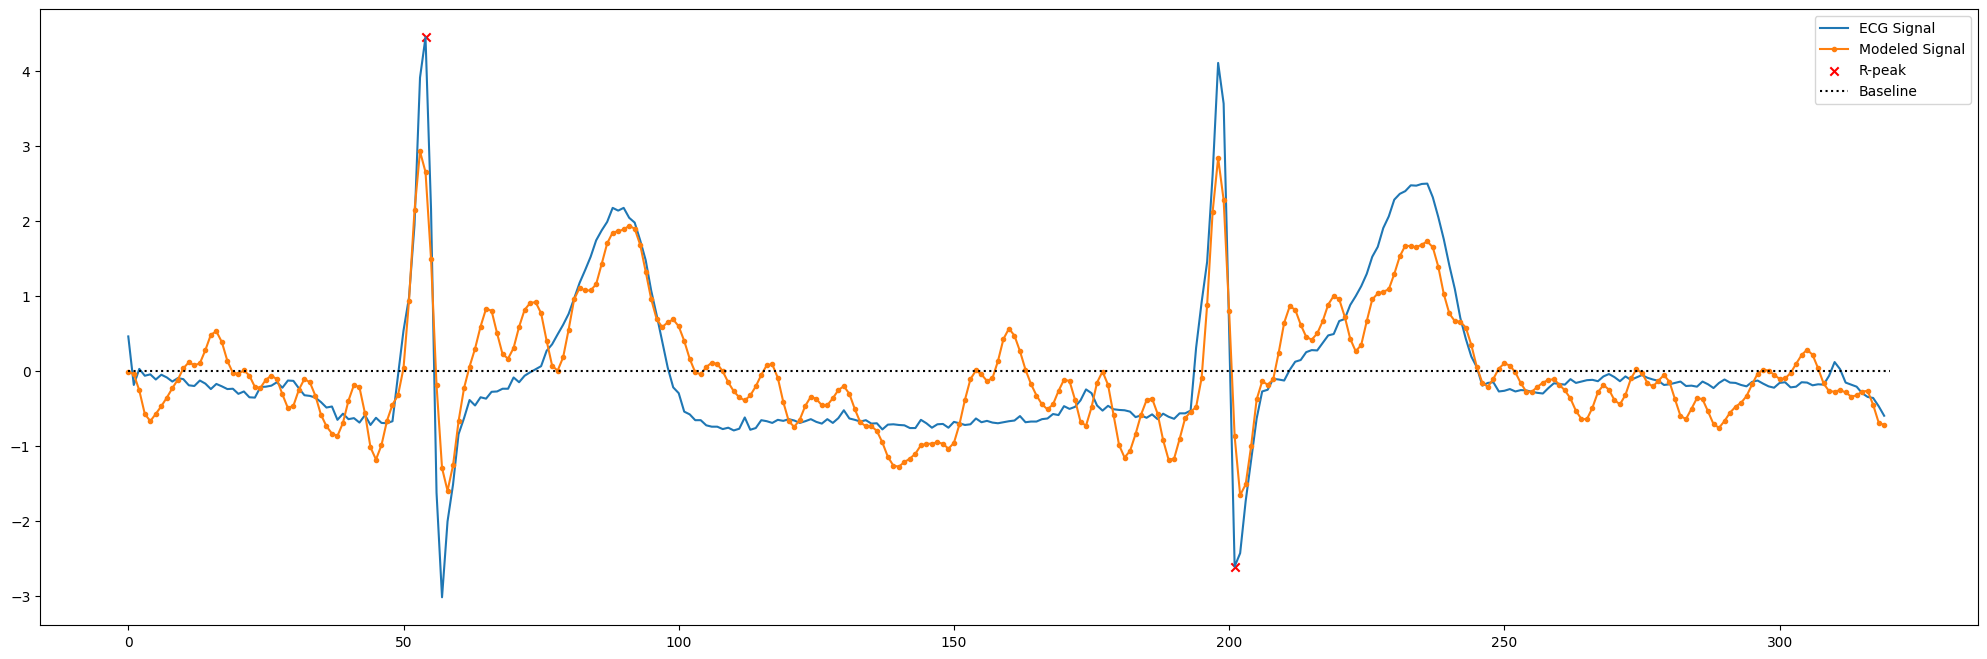

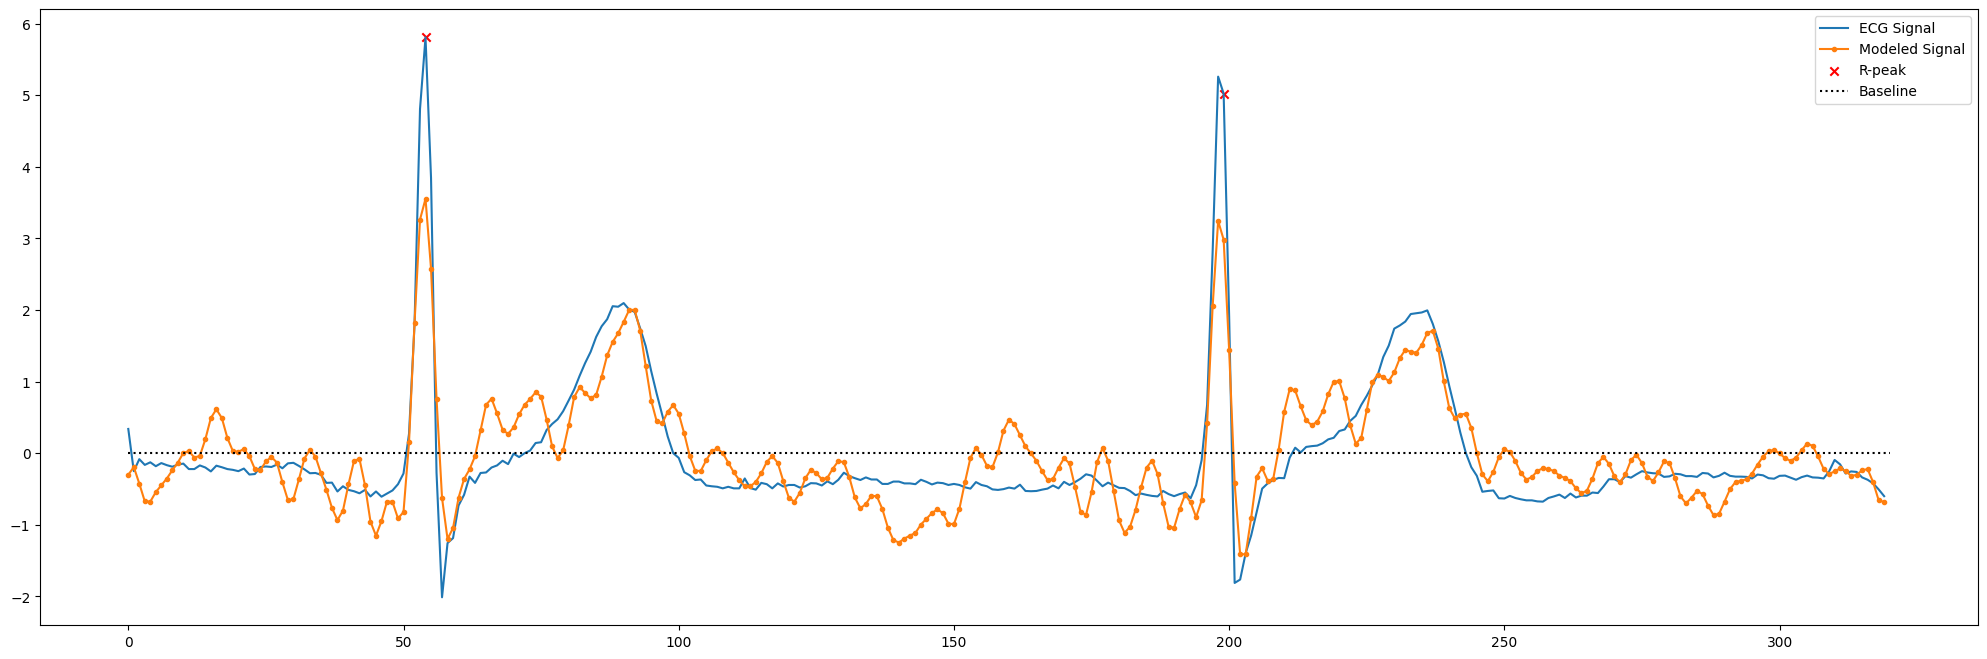

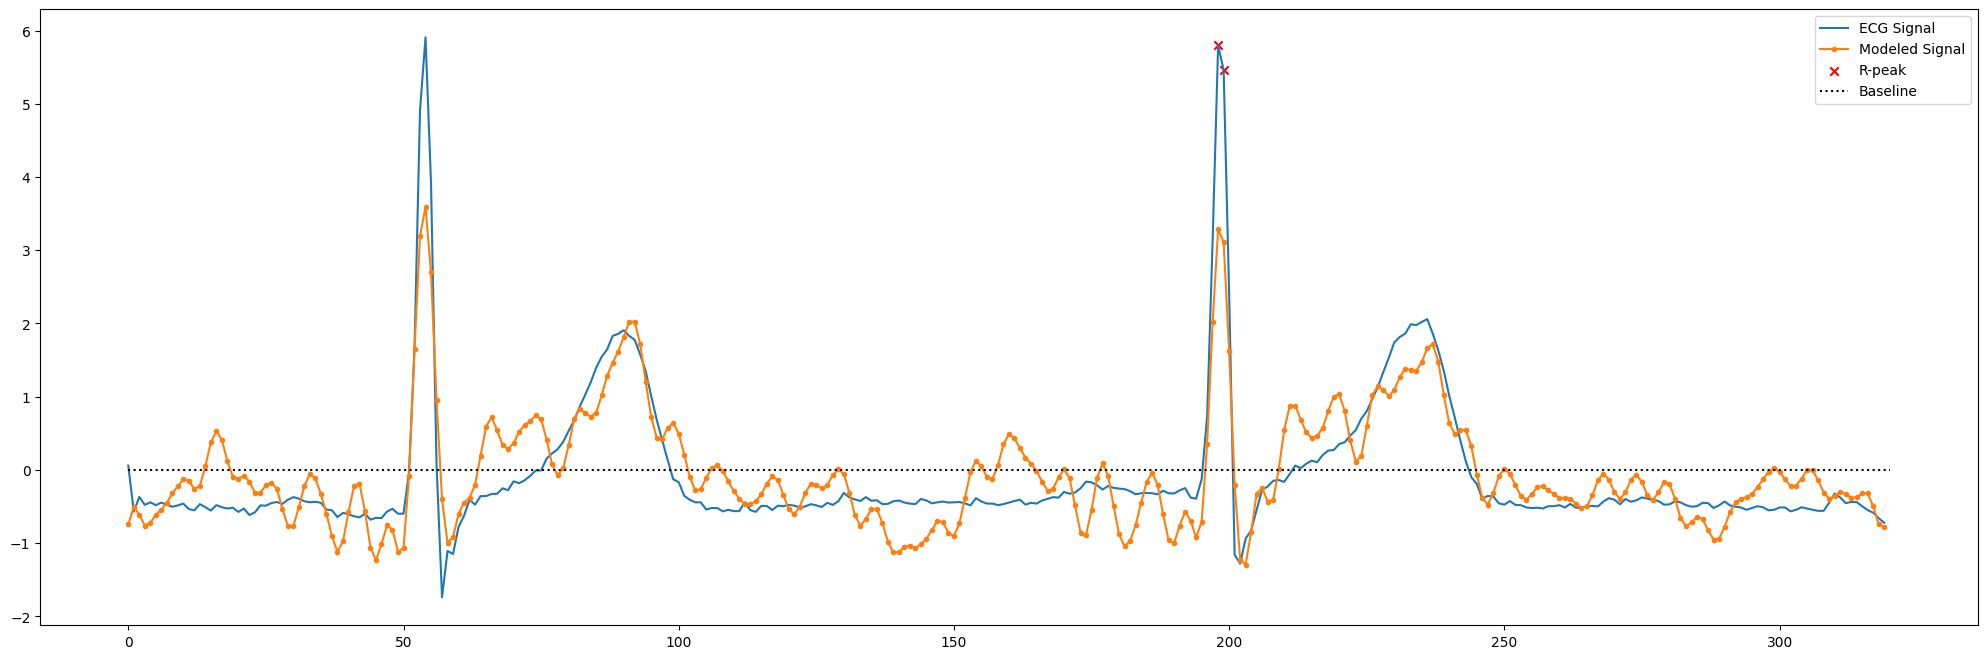

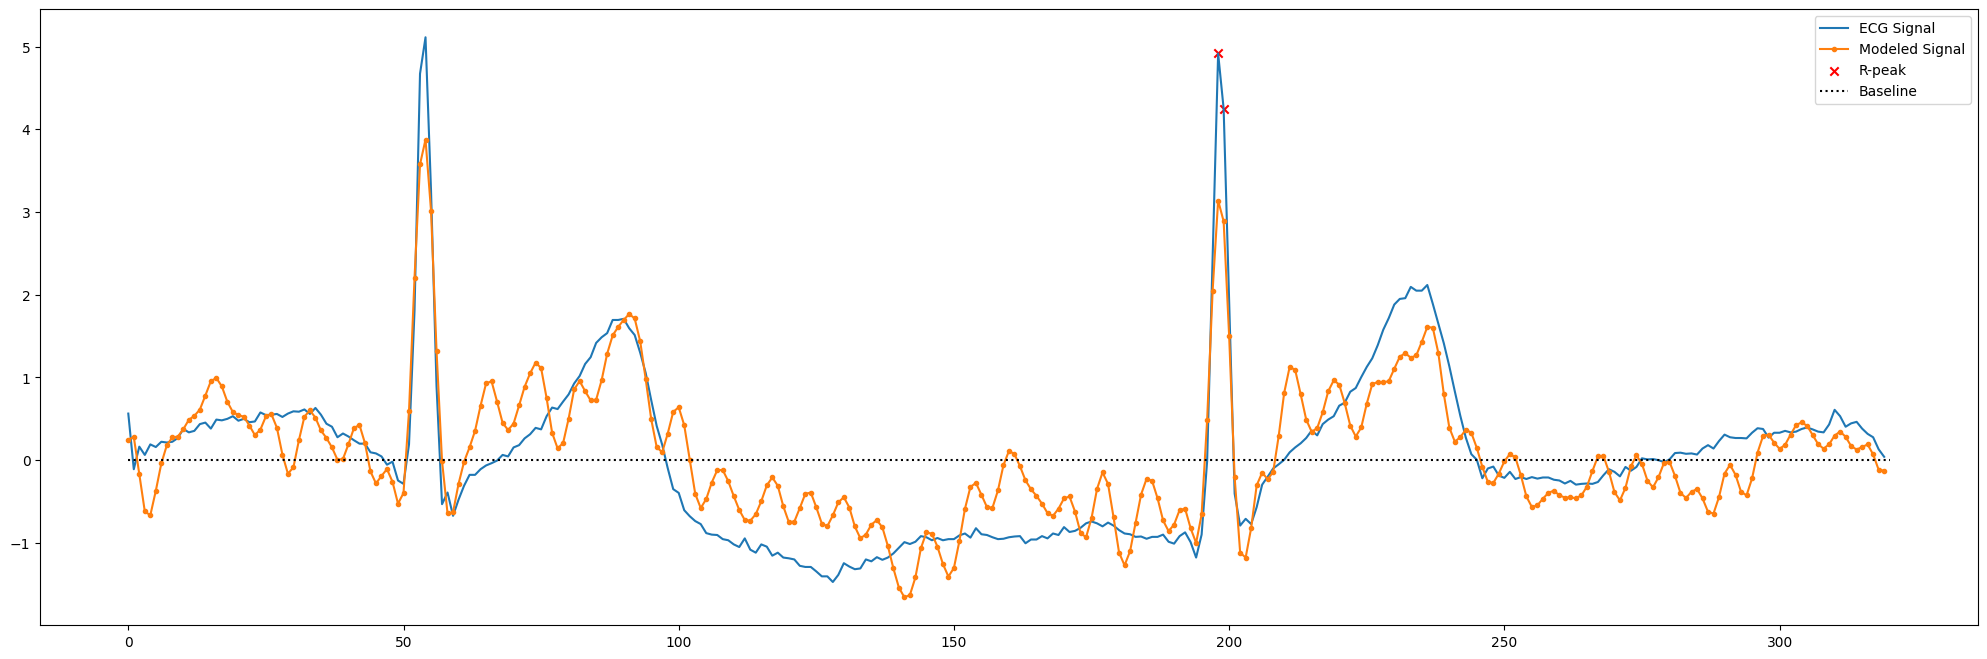

In [41]:
time = np.arange(fit_index)
for i in range(12):    
    difference = np.abs(Y[i][:fit_index] - rec[i][:fit_index])
    threshold = np.percentile(difference, 99.5)
    
    isolated_peaks = np.where(difference > threshold, Y[i][:fit_index], 0)
    non_zero_indices = isolated_peaks != 0
    non_zero_times = time[non_zero_indices]
    non_zero_peaks = isolated_peaks[non_zero_indices]
    
    non_zero_positions = np.where(isolated_peaks != 0)[0]
    print(non_zero_positions)
    for nz in non_zero_positions:
        pass
    
    plt.figure(figsize=(25, 8))
    plt.plot(time, Y[i][:fit_index], '-', label='ECG Signal')
    plt.plot(time, rec[i][:fit_index], '.-', label='Modeled Signal')
    plt.scatter(non_zero_times, non_zero_peaks, label='R-peak', marker='x', c="r")
    plt.hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black", label="Baseline")
    plt.legend()